In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as Rectangle
import random
import seaborn as sns

In [15]:
df = pd.read_csv('E:\Curso_Data_Science_Code\Data_Science\Entrega2\Data\Life Expectancy Data.csv')

In [16]:
df.head(100)

Country  Year      Status  Life expectancy   Adult Mortality  \
0   Afghanistan  2015  Developing              65.0            263.0   
1   Afghanistan  2014  Developing              59.9            271.0   
2   Afghanistan  2013  Developing              59.9            268.0   
3   Afghanistan  2012  Developing              59.5            272.0   
4   Afghanistan  2011  Developing              59.2            275.0   
..          ...   ...         ...               ...              ...   
95    Argentina  2000  Developing              74.1            137.0   
96      Armenia  2015  Developing              74.8            118.0   
97      Armenia  2014  Developing              74.6             12.0   
98      Armenia  2013  Developing              74.4            123.0   
99      Armenia  2012  Developing              74.4            121.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0              62     0.01               71.279624         65.0      1154   
1              64     0.01               73.523582         62.0       492   
2              66     0.01               73.219243         64.0       430   
3              69     0.01               78.184215         67.0      2787   
4              71     0.01                7.097109         68.0      3013   
..            ...      ...                     ...          ...       ...   
95             12     7.68             1349.025282          NaN         6   
96              1      NaN                0.000000         94.0        33   
97              1     3.91              295.608714         93.0        13   
98              1     3.79              279.429081         95.0        10   
99              1     3.89              274.152699         95.0         0   

    ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
0   ...    6.0               8.16         65.0        0.1   584.259210   
1   ...   58.0               8.18         62.0        0.1   612.696514   
2   ...   62.0               8.13         64.0        0.1   631.744976   
3   ...   67.0               8.52         67.0        0.1   669.959000   
4   ...   68.0               7.87         68.0        0.1    63.537231   
..  ...    ...                ...          ...        ...          ...   
95  ...   88.0               9.21         83.0        0.1  7669.273916   
96  ...   96.0                NaN         94.0        0.1   369.654776   
97  ...   95.0               4.48         93.0        0.1  3994.712355   
98  ...   96.0               4.55         95.0        0.1  3843.591213   
99  ...   96.0               4.48         95.0        0.1  3684.848100   

    Population   thinness  1-19 years   thinness 5-9 years  \
0   33736494.0                   17.2                 17.3   
1     327582.0                   17.5                 17.5   
2   31731688.0                   17.7                 17.7   
3    3696958.0                   17.9                 18.0   
4    2978599.0                   18.2                 18.2   
..         ...                    ...                  ...   
95   3757452.0                    1.2                  1.1   
96    291695.0                    2.1                  2.2   
97     29622.0                    2.1                  2.1   
98    289359.0                    2.1                  2.1   
99   2881922.0                    2.0                  2.1   

    Income composition of resources  Schooling  
0                             0.479       10.1  
1                             0.476       10.0  
2                             0.470        9.9  
3                             0.463        9.8  
4                             0.454        9.5  
..                              ...        ...  
95                            0.764       15.0  
96                            0.741       12.7  
97                            0.739       12.7  
98                            0.736       12.7  
99                            0.732       12.

### Grafica de expectativa de vida por pais. 
#### Se decide plotear cada uno individual por la cantidad de paises existentes dado que no queda visible en un solo grafico toda la info.

C:\Users\frami\AppData\Roaming\Python\Python311\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


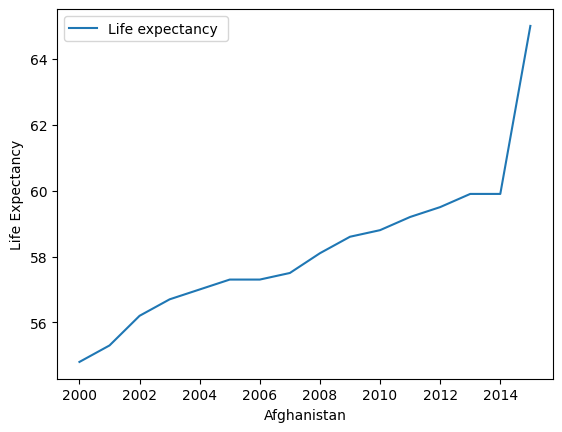

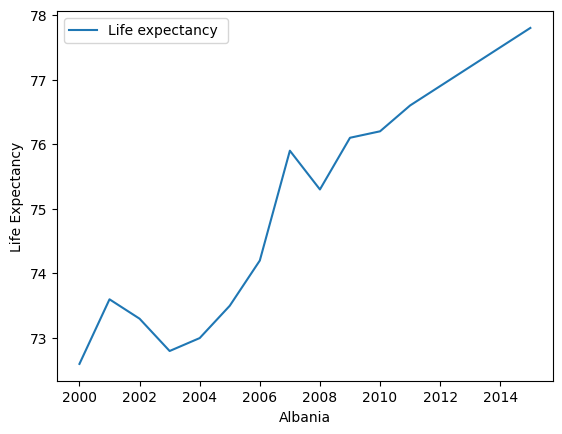

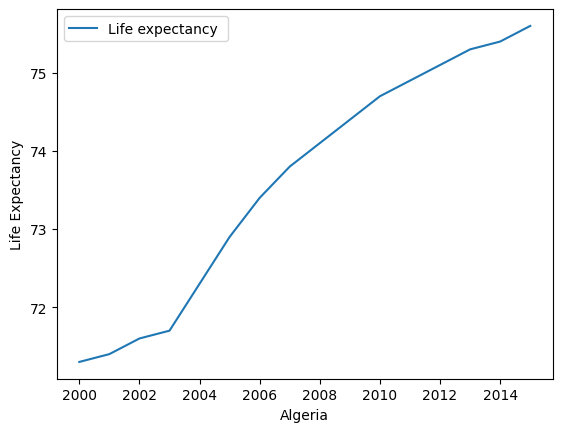

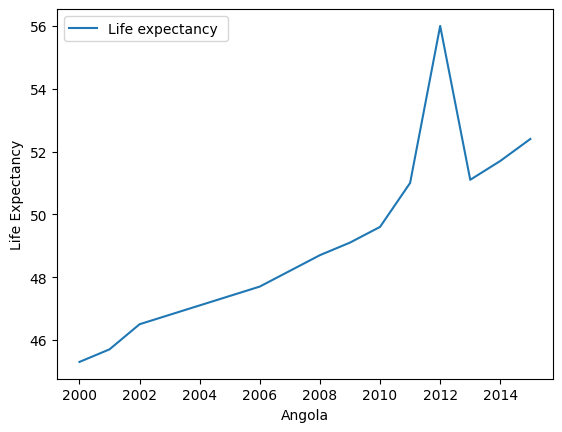

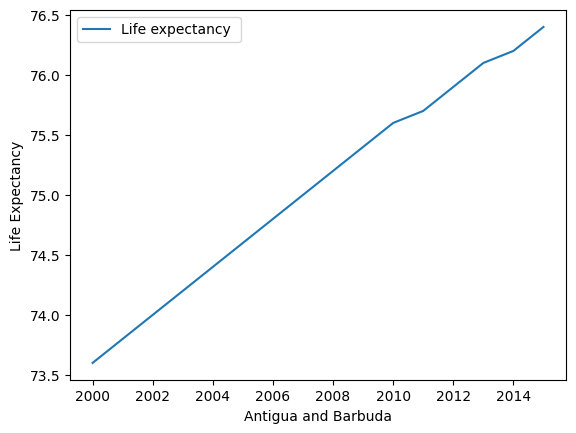

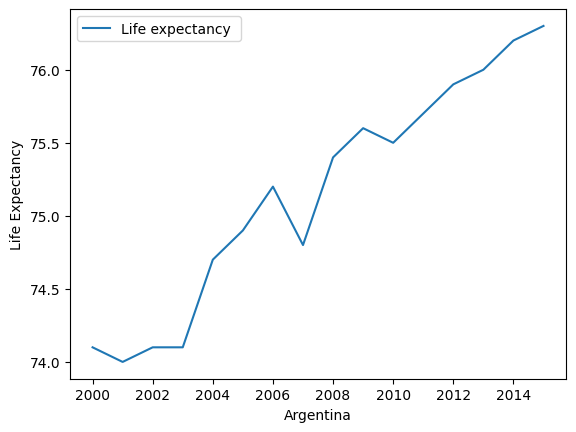

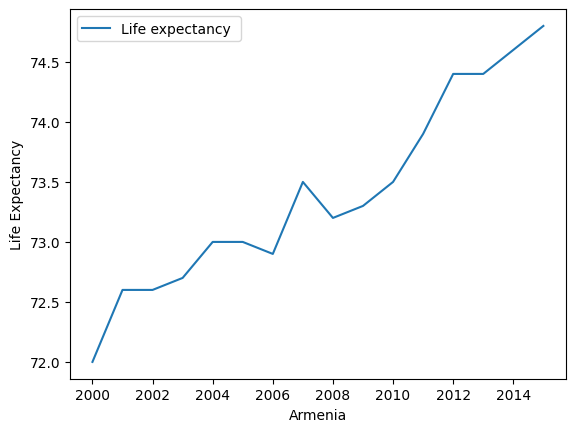

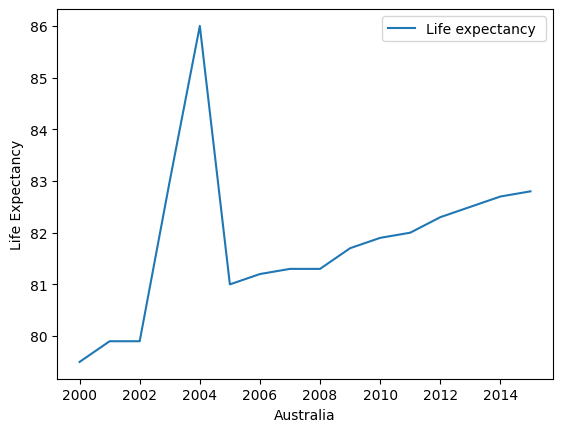

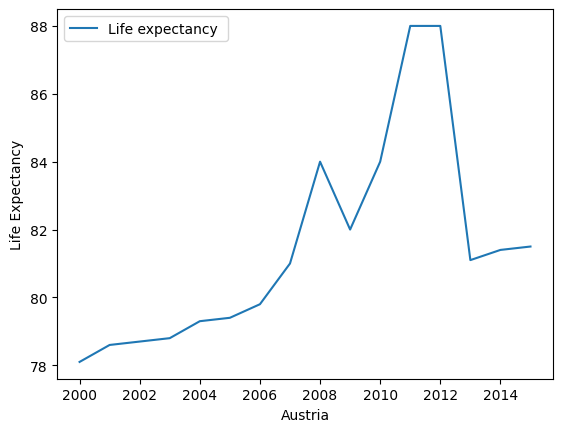

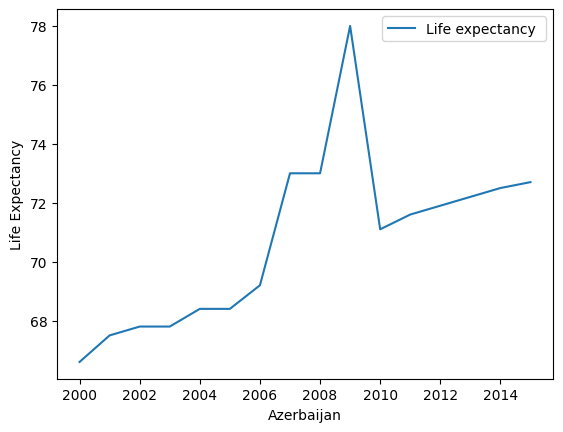

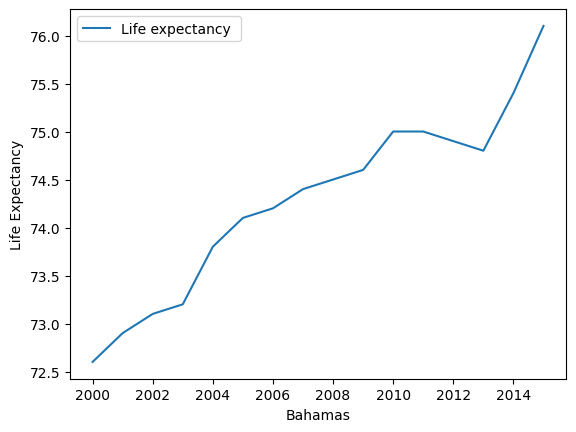

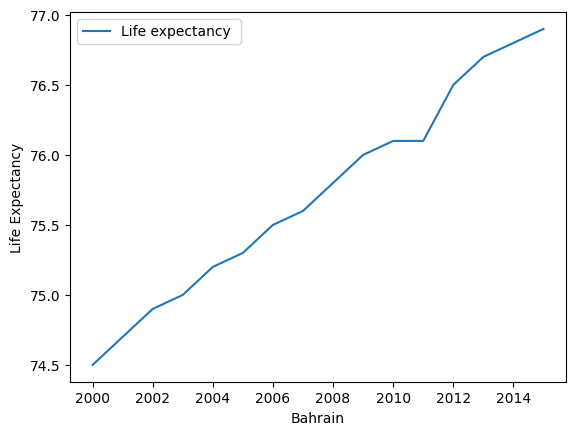

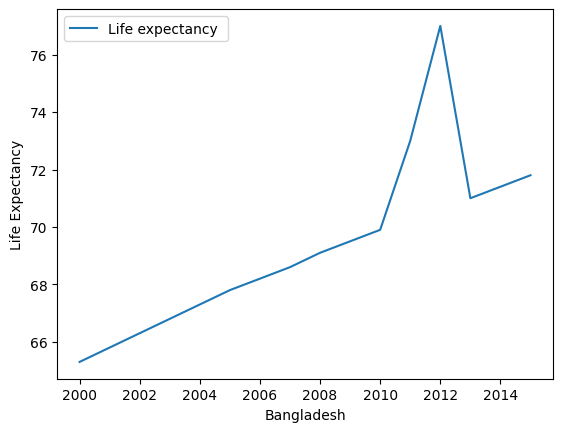

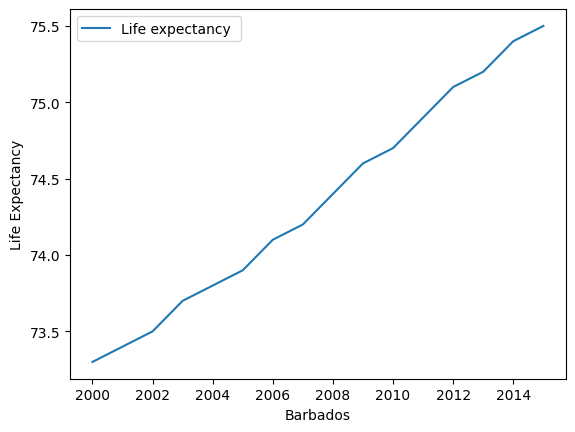

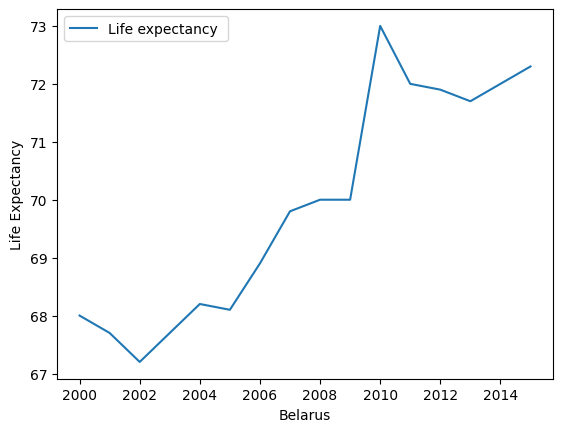

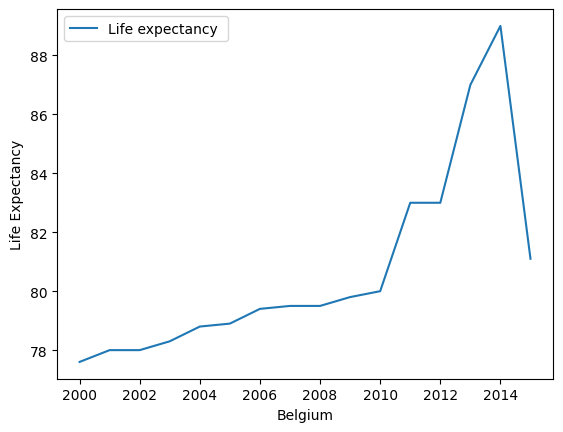

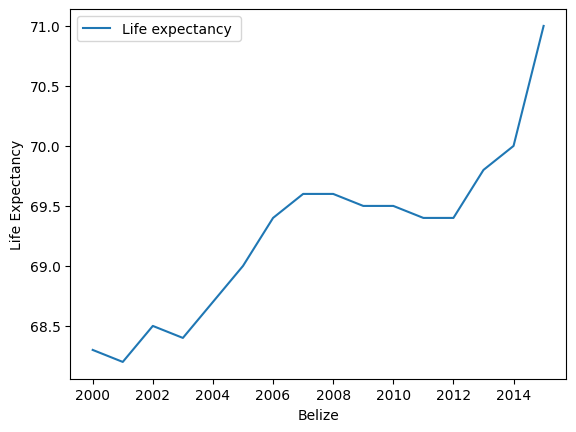

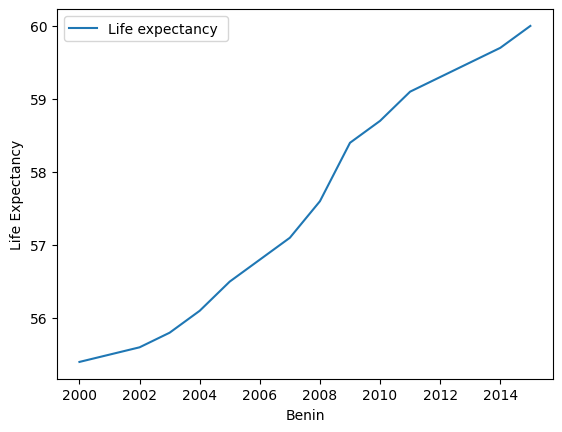

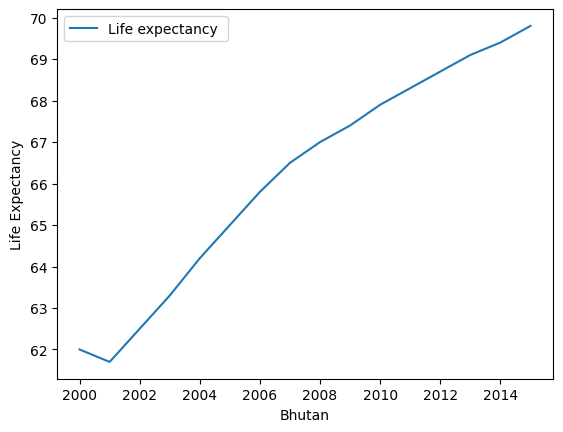

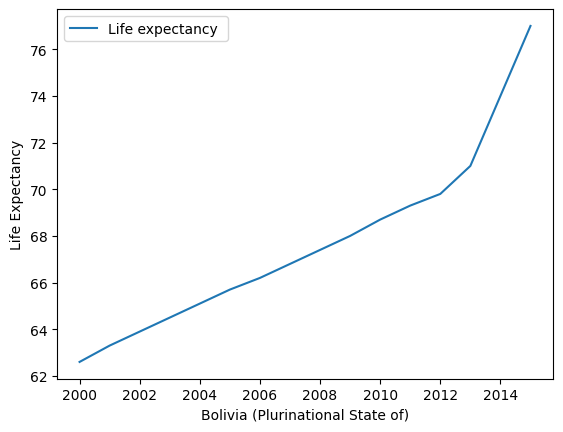

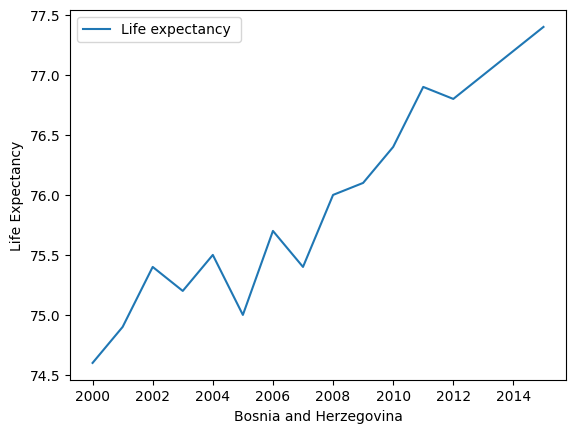

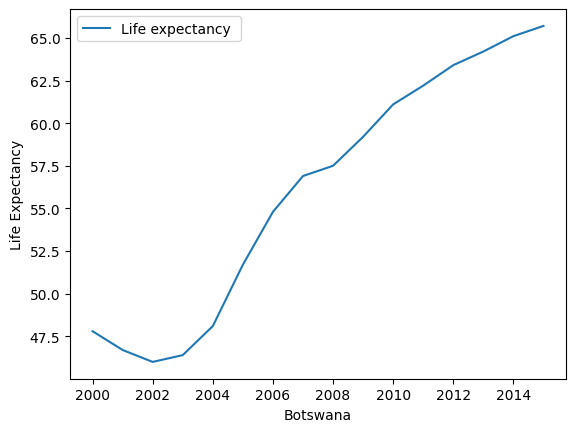

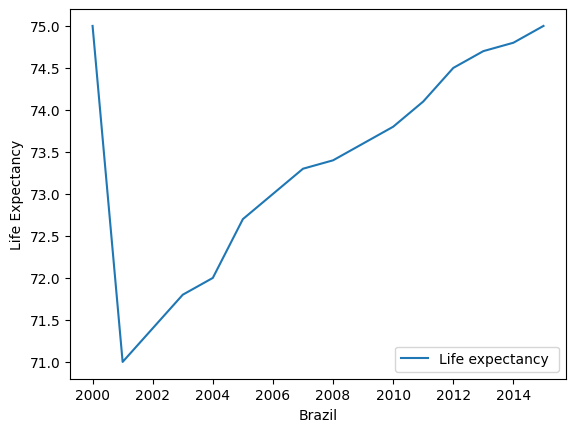

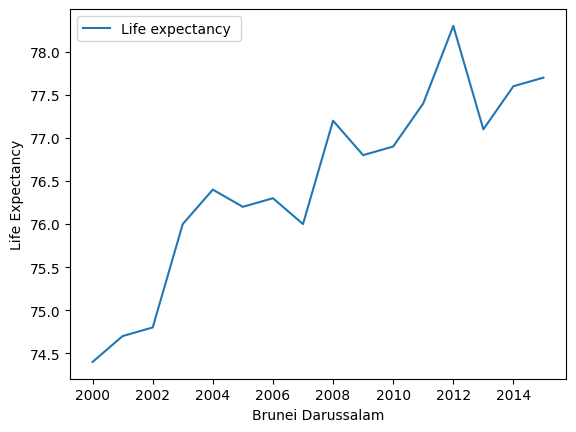

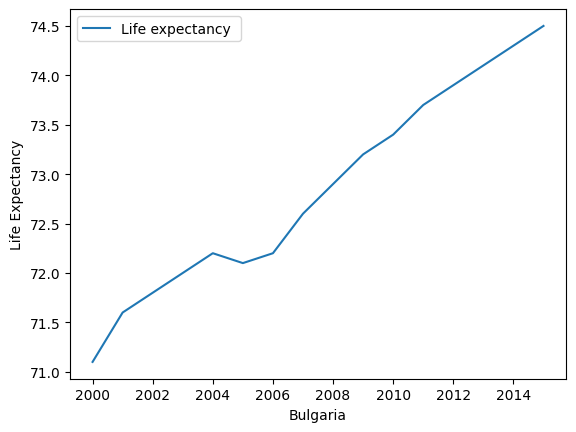

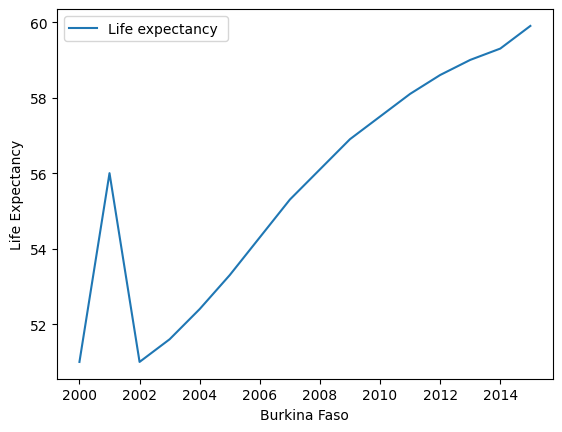

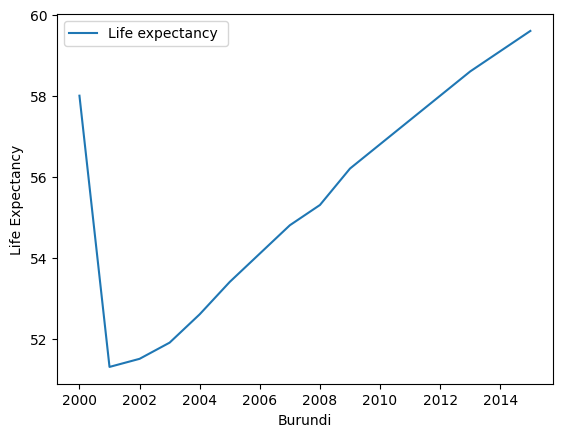

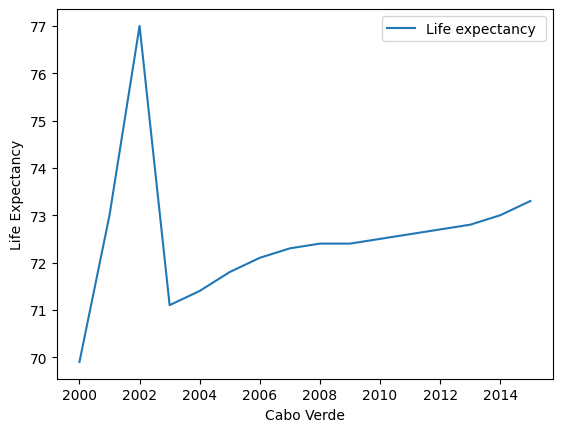

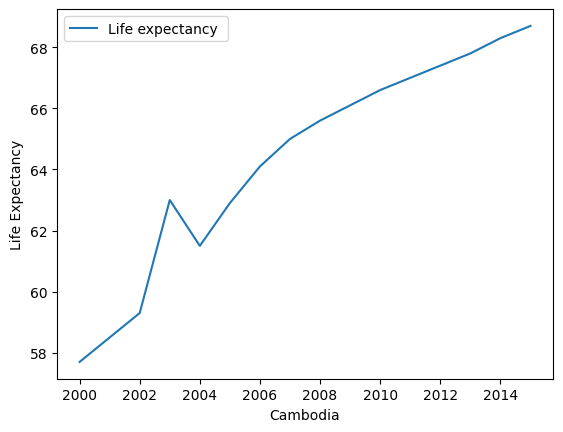

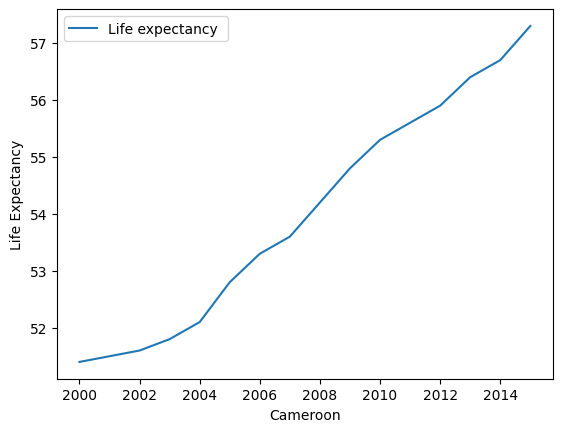

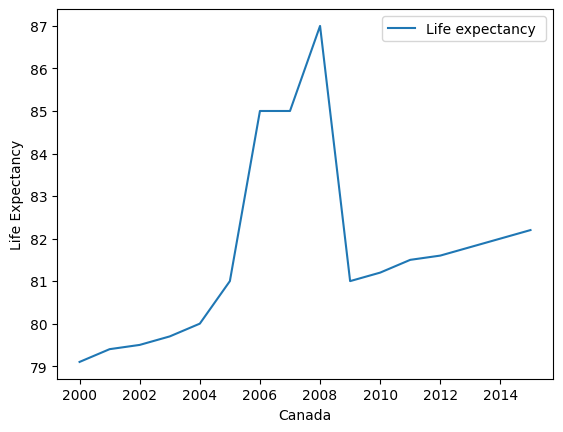

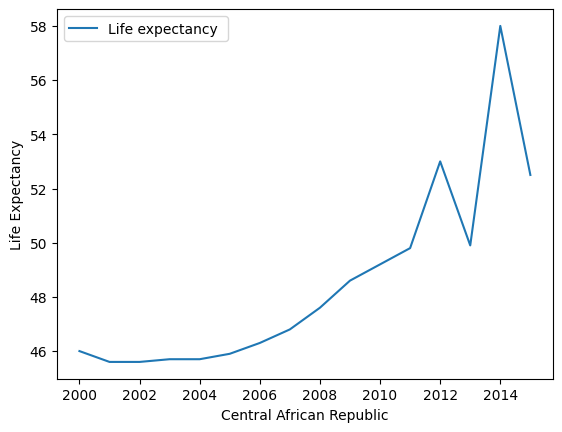

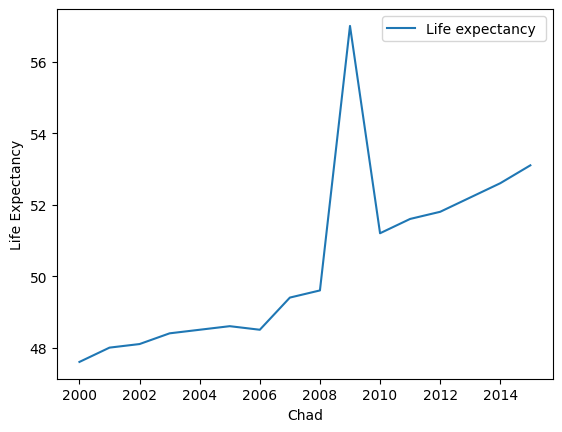

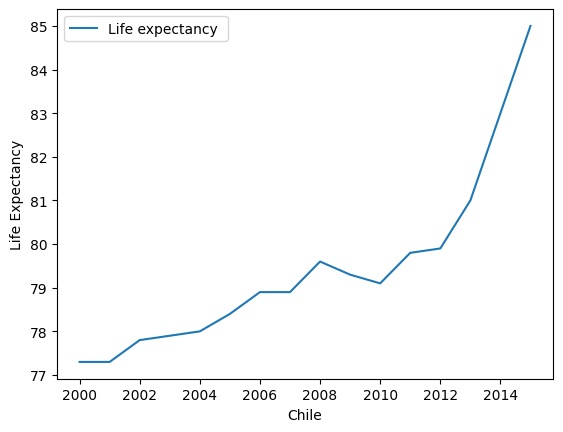

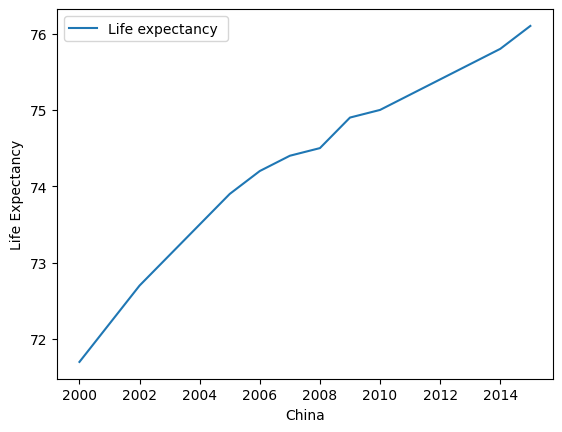

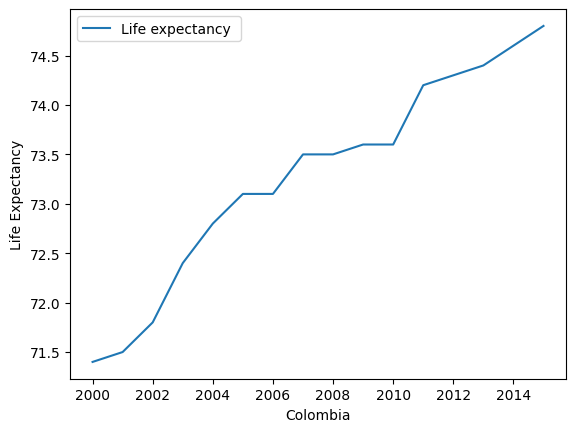

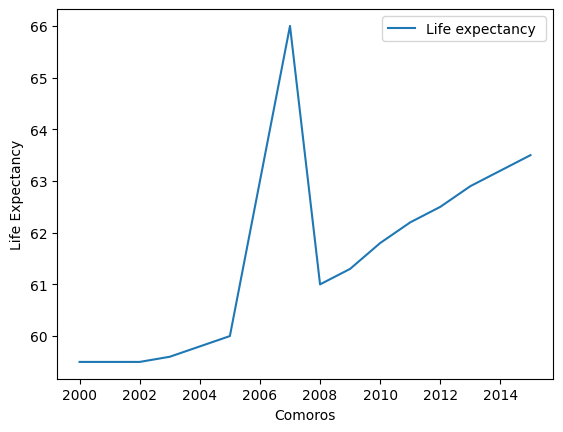

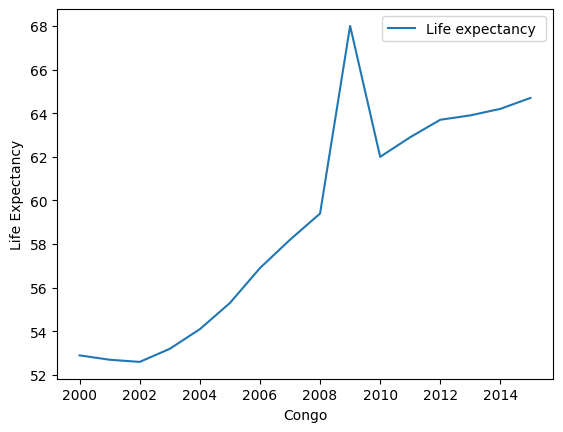

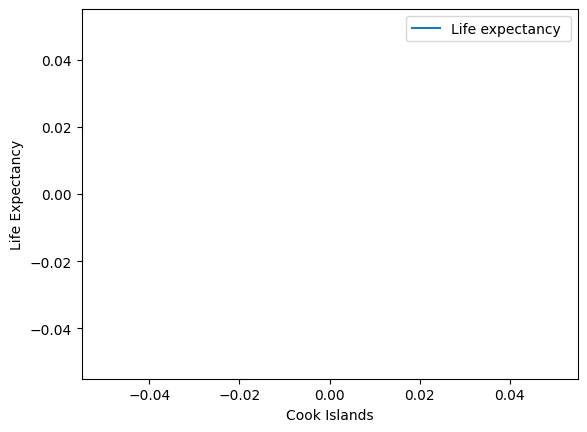

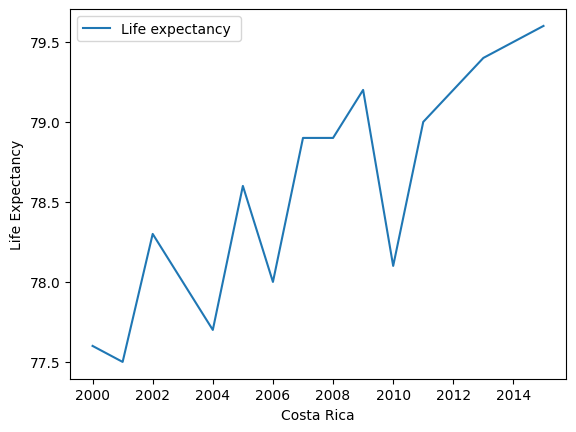

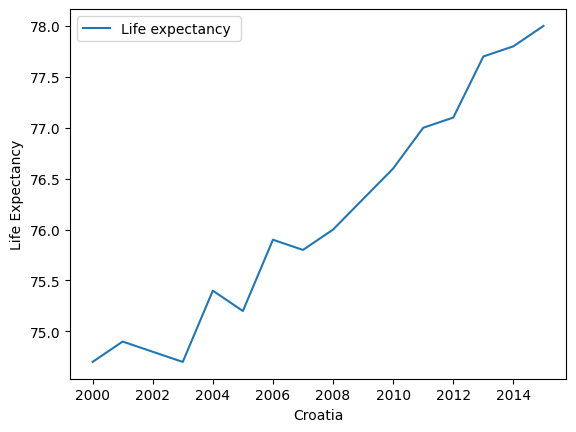

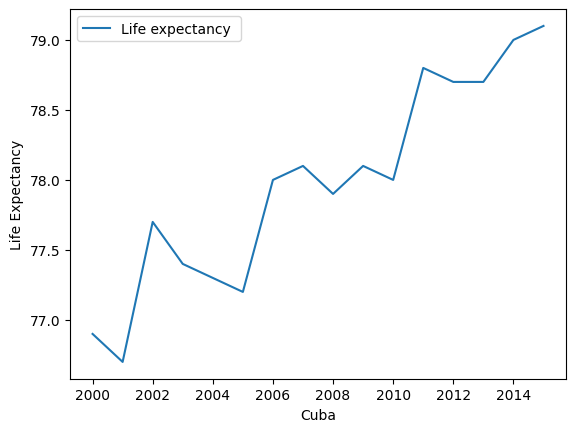

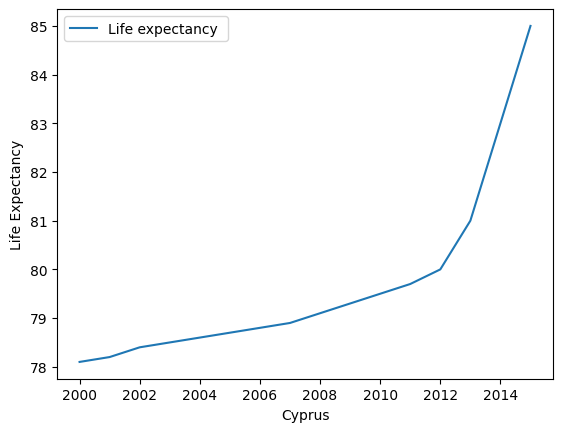

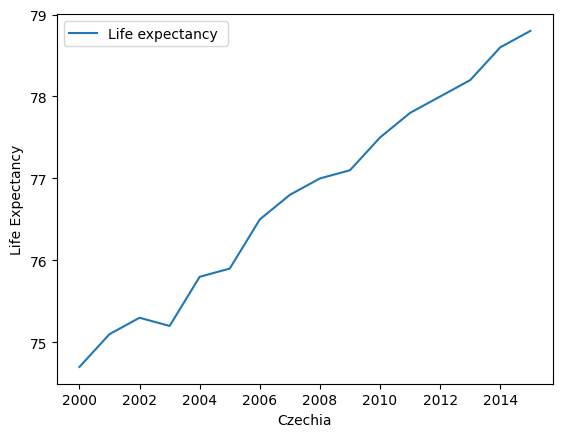

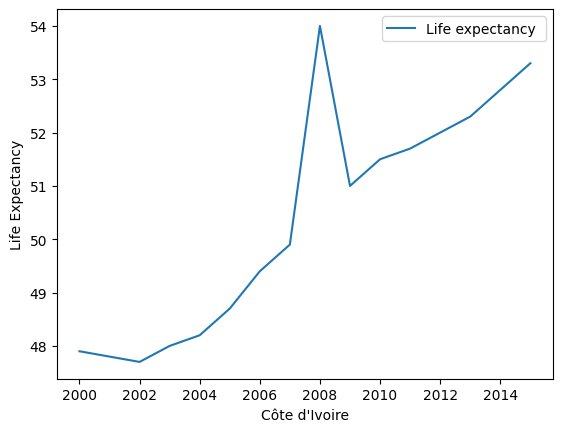

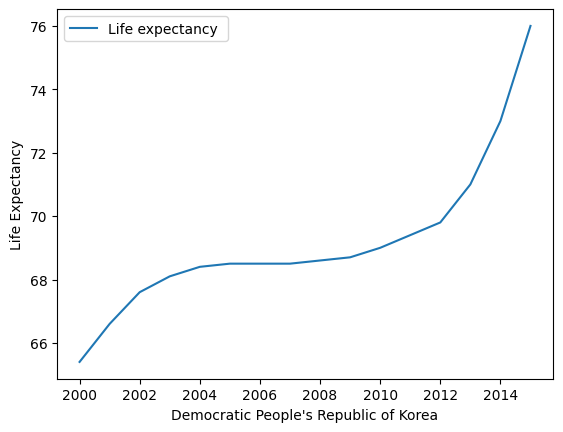

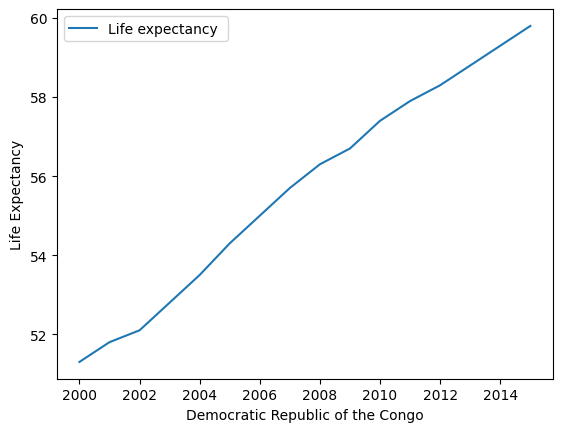

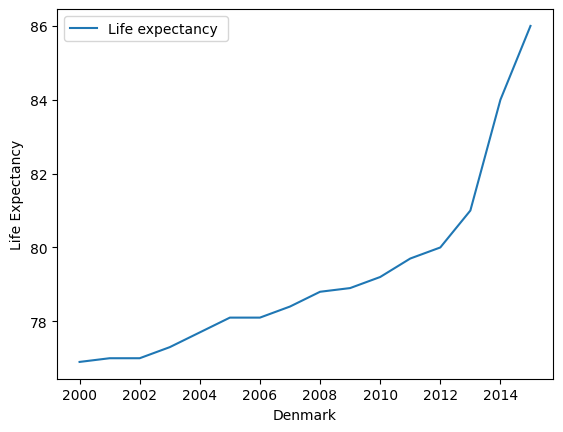

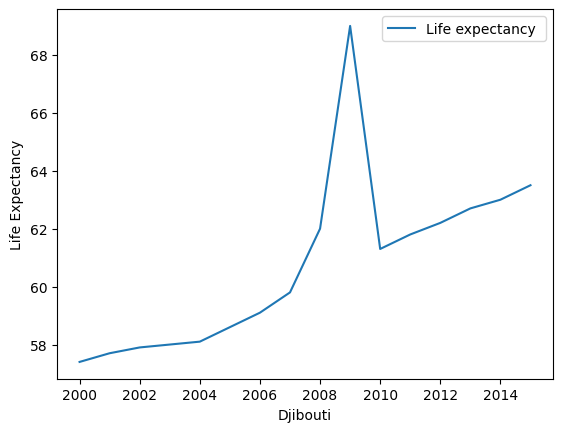

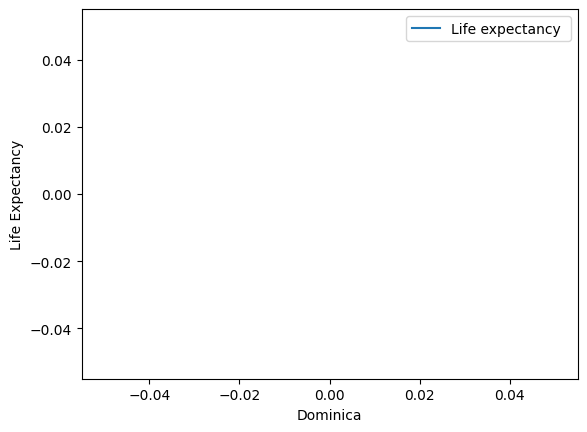

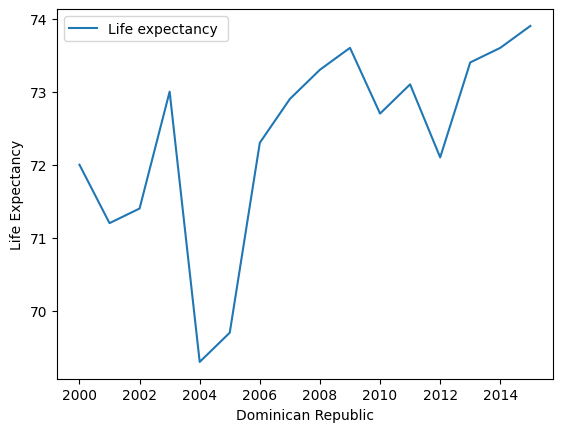

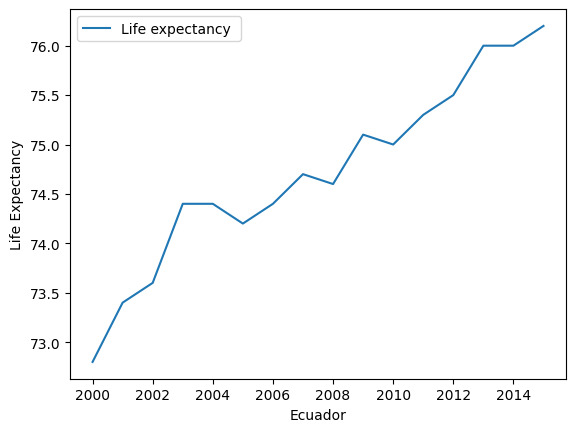

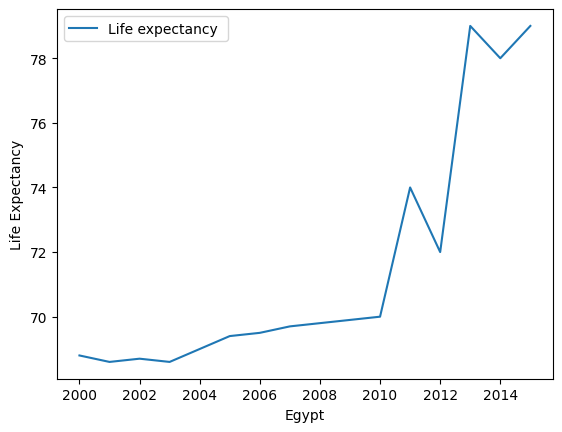

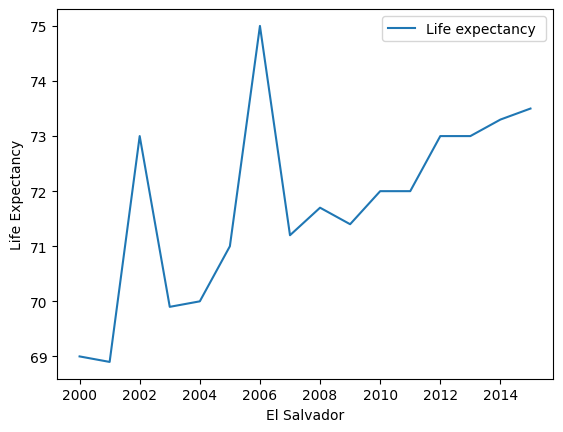

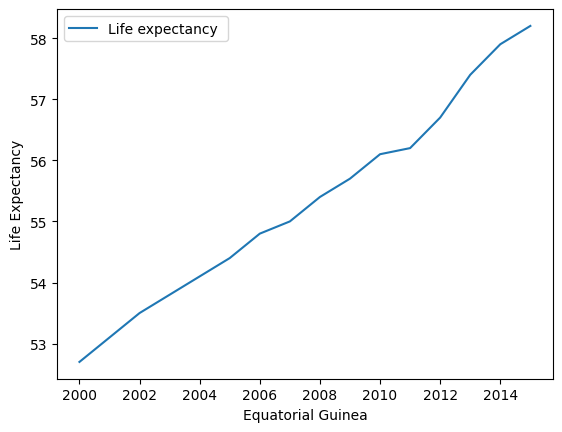

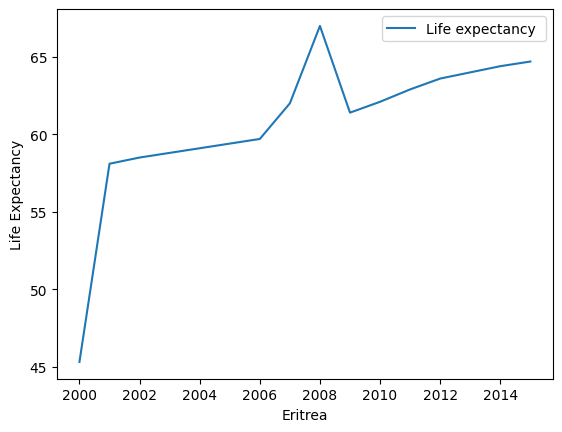

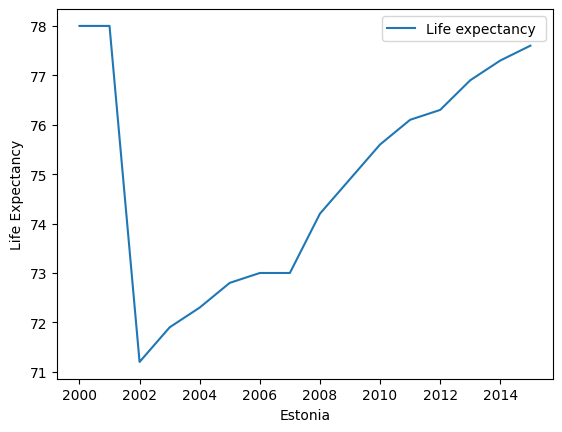

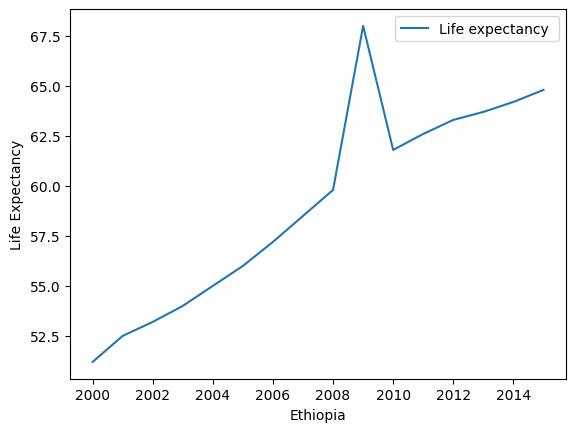

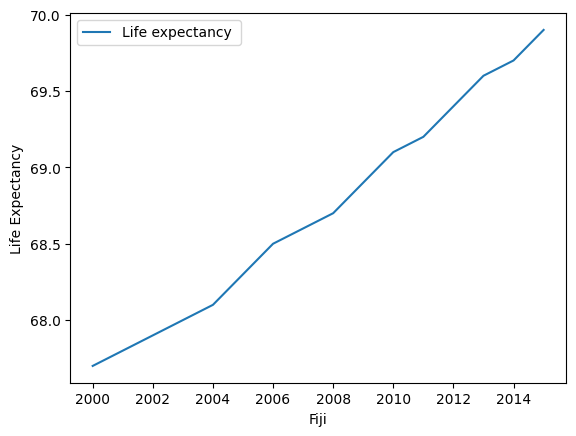

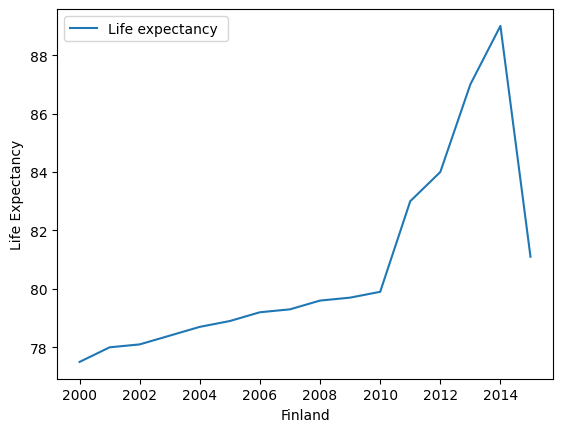

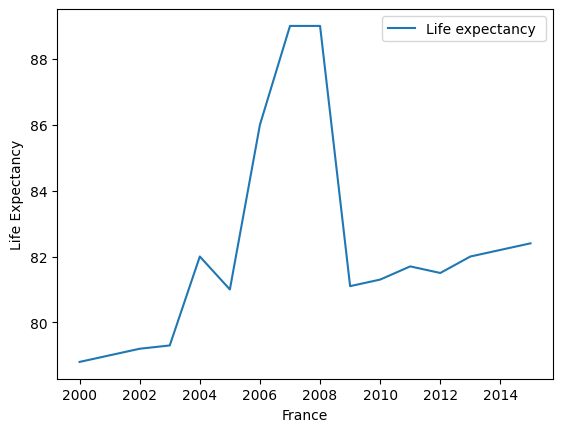

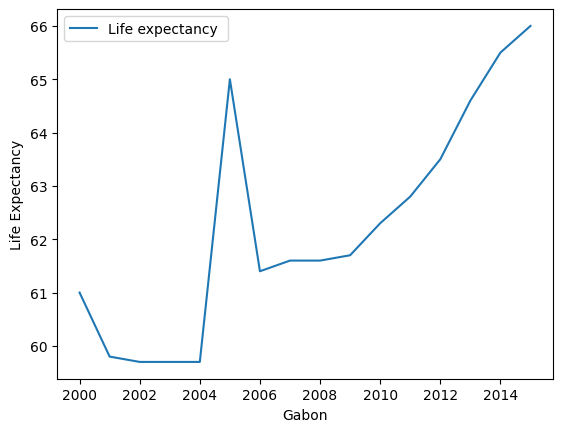

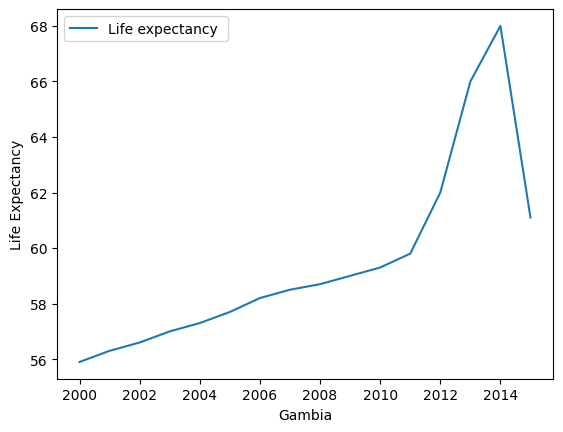

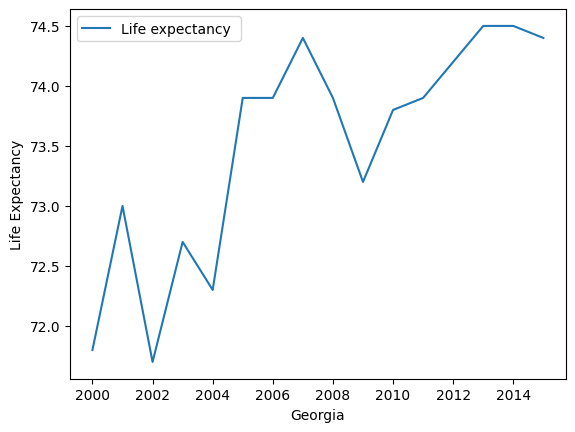

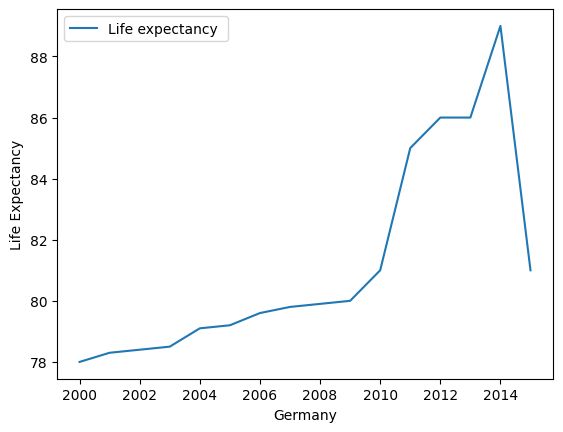

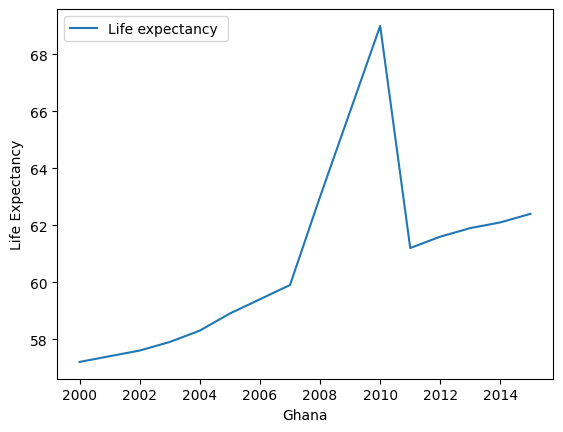

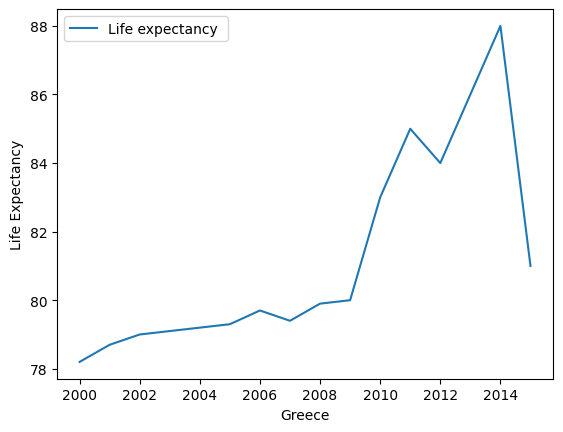

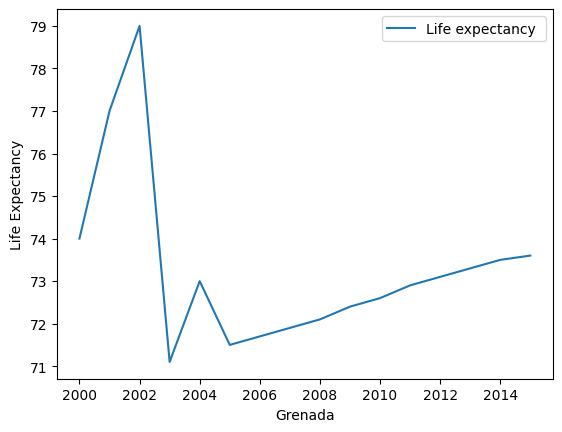

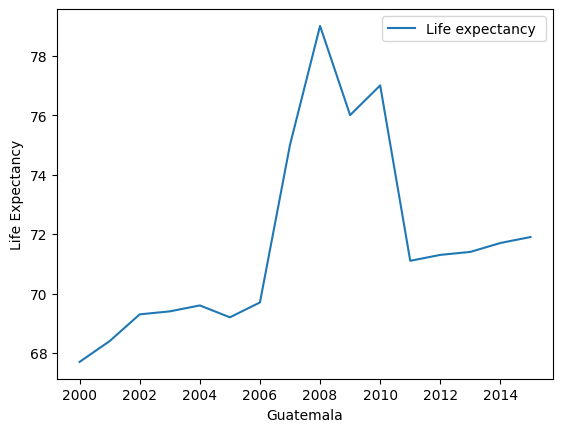

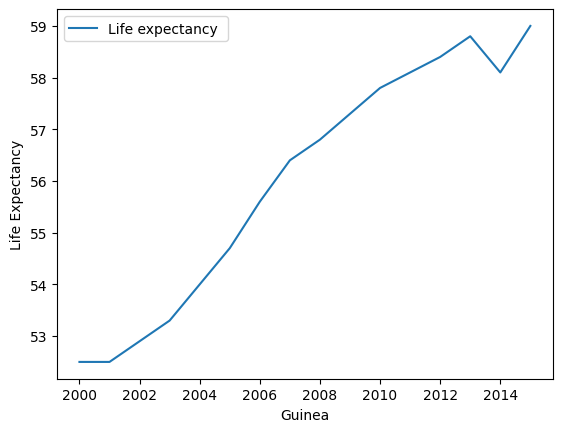

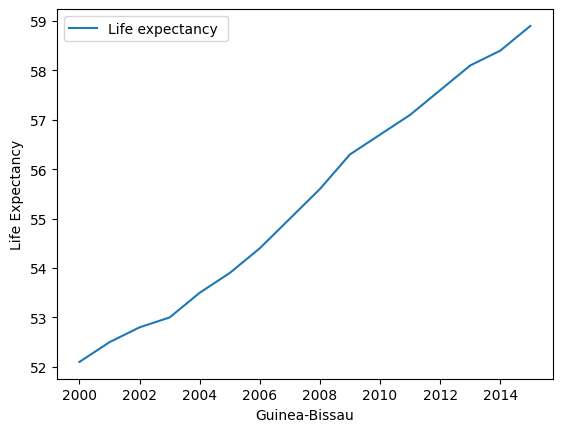

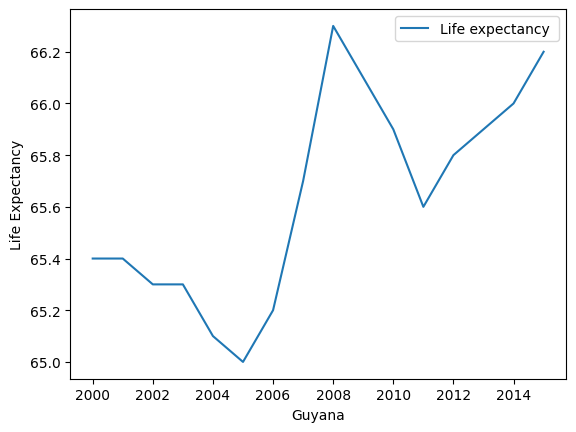

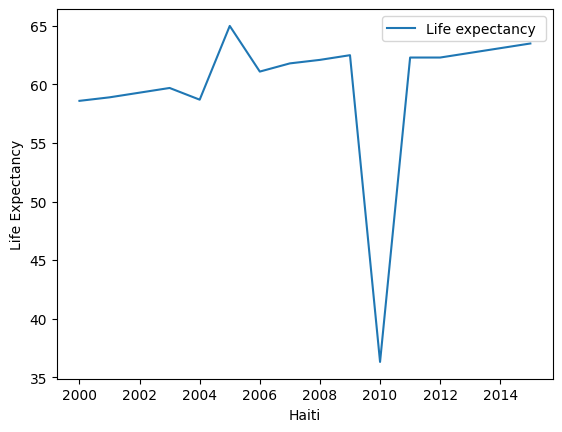

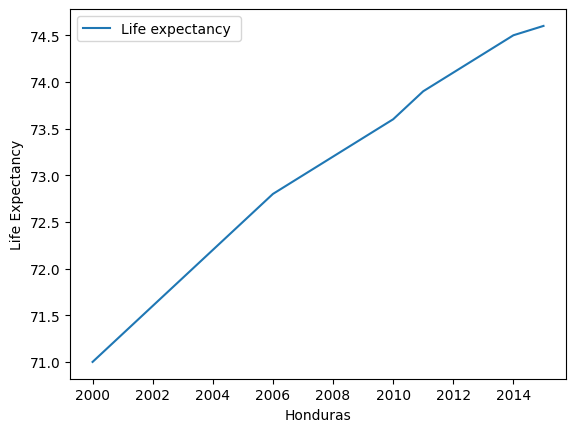

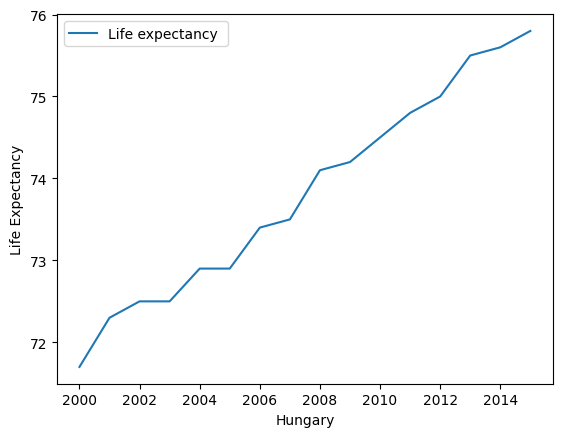

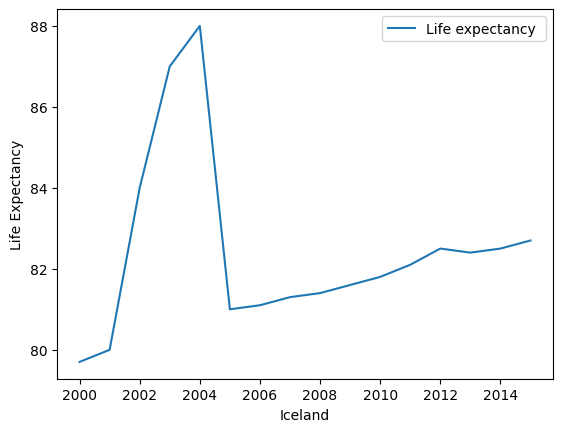

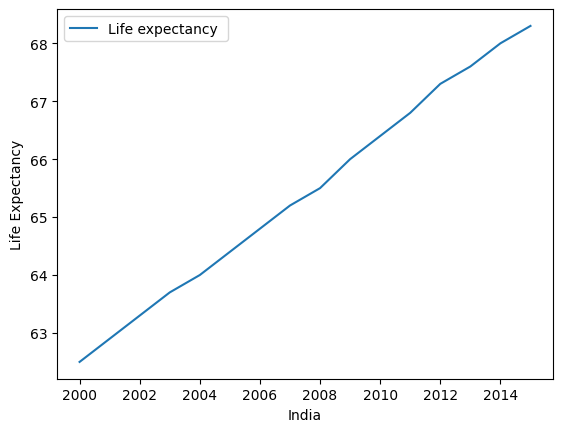

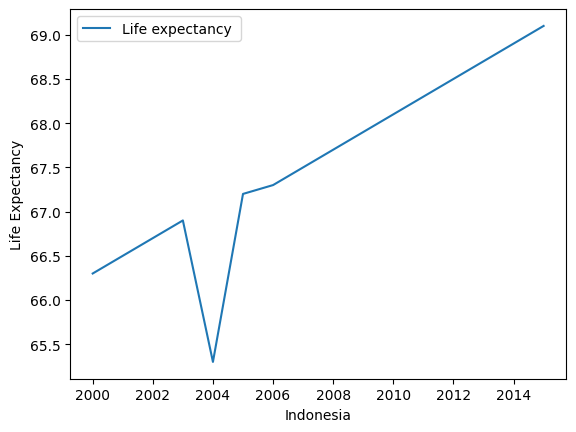

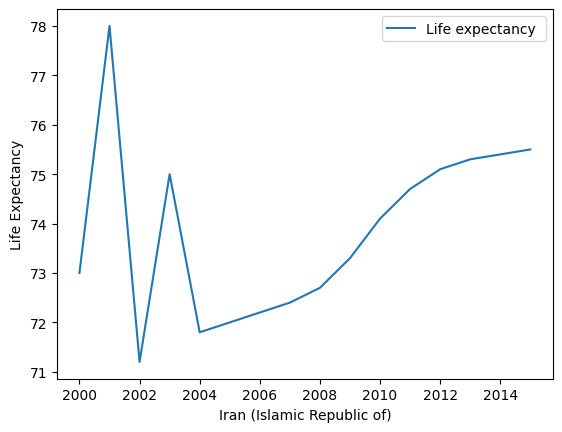

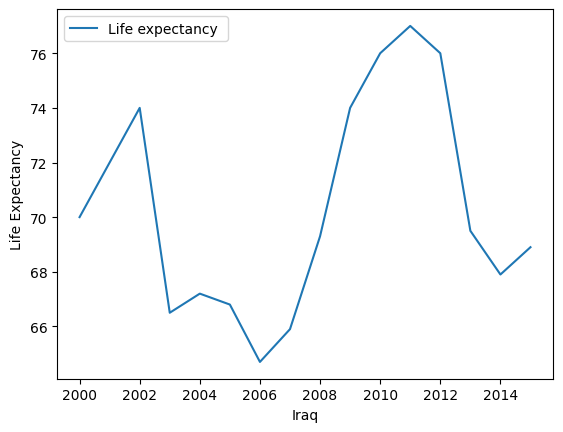

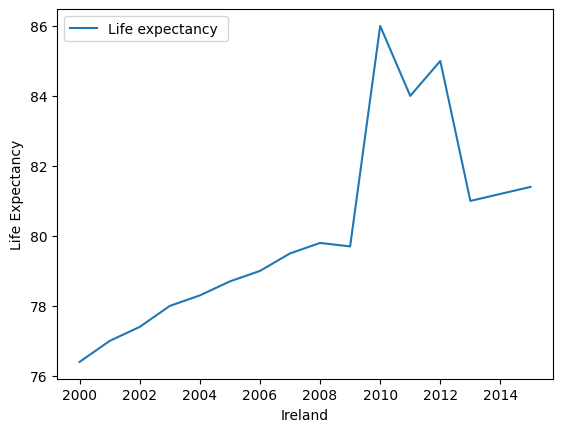

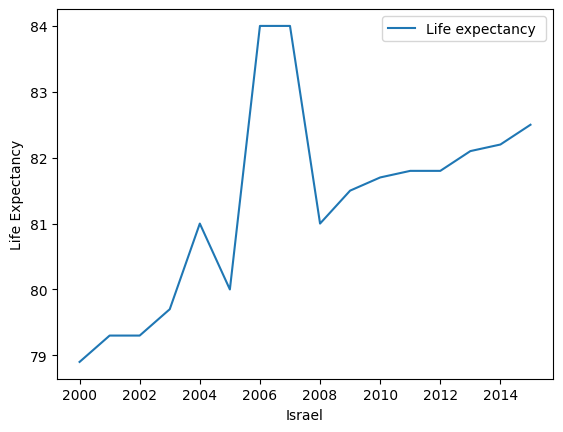

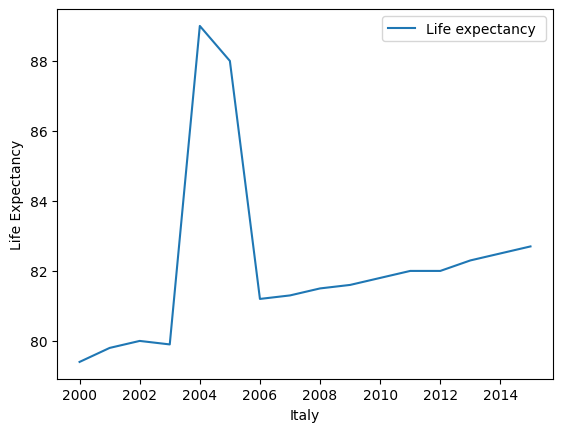

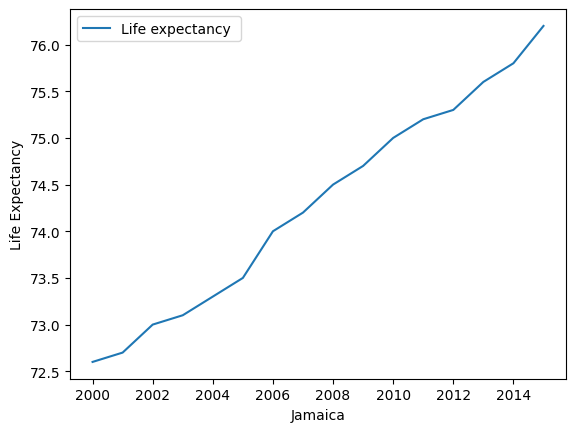

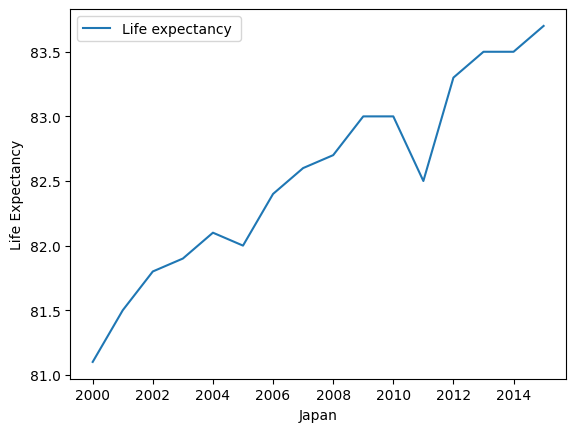

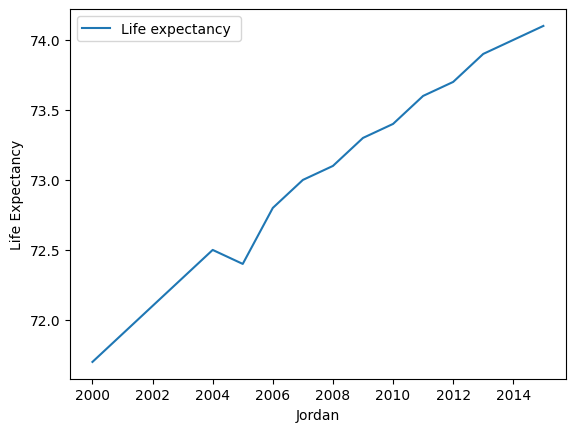

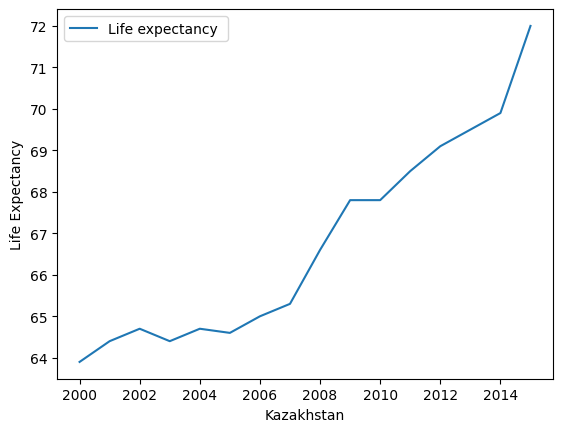

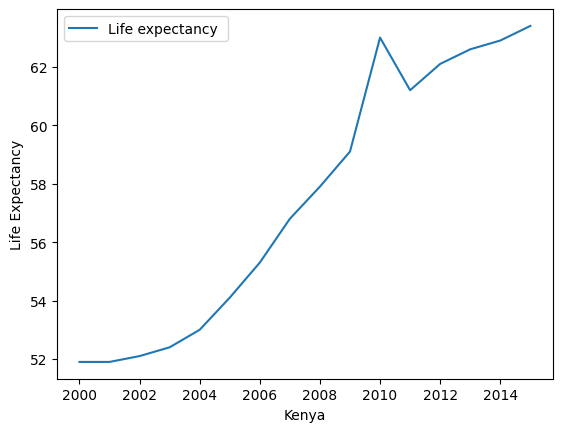

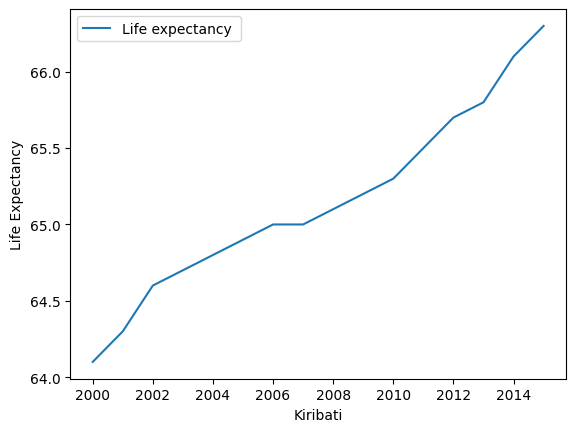

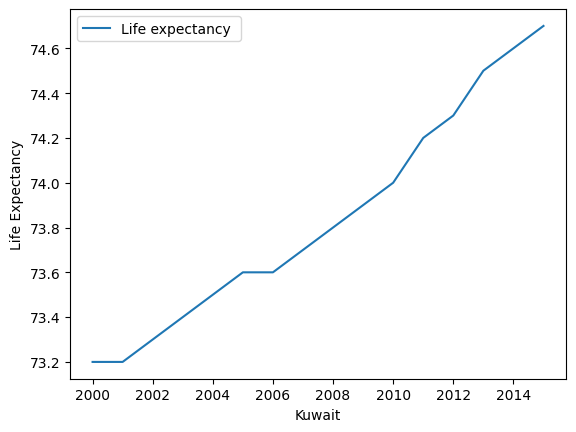

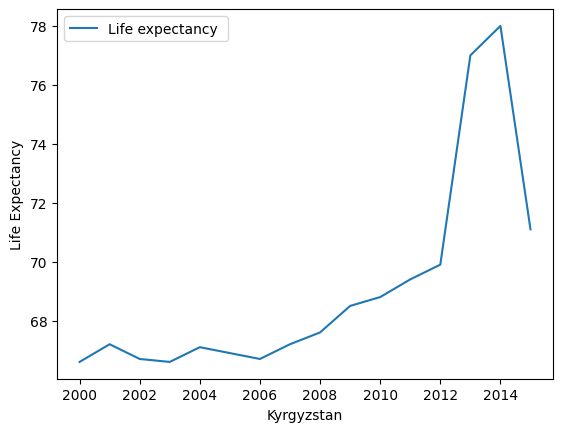

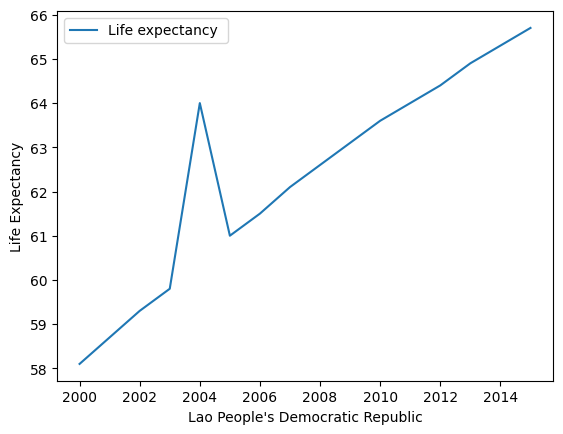

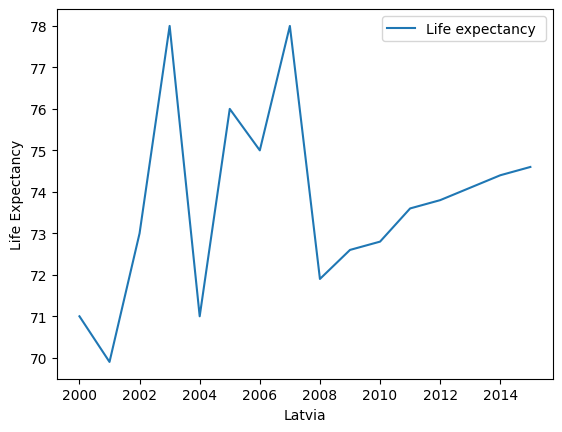

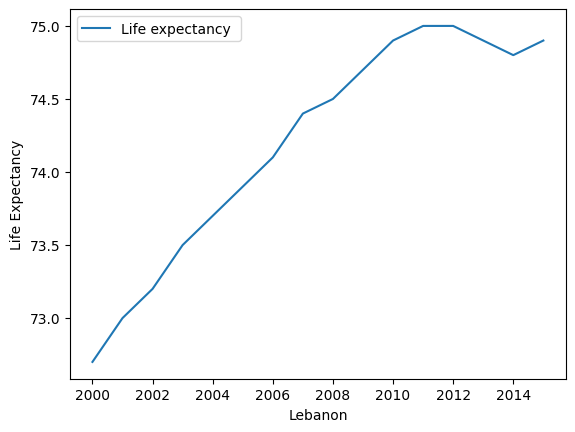

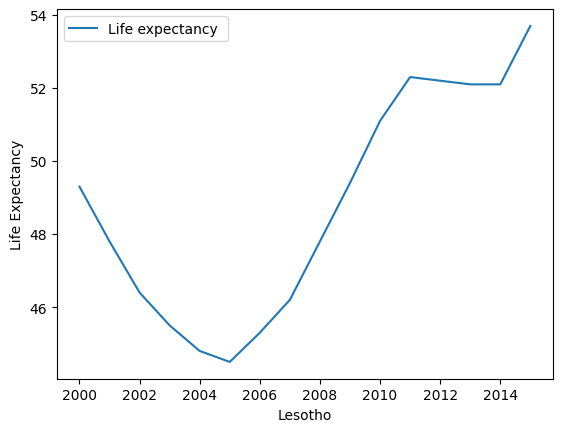

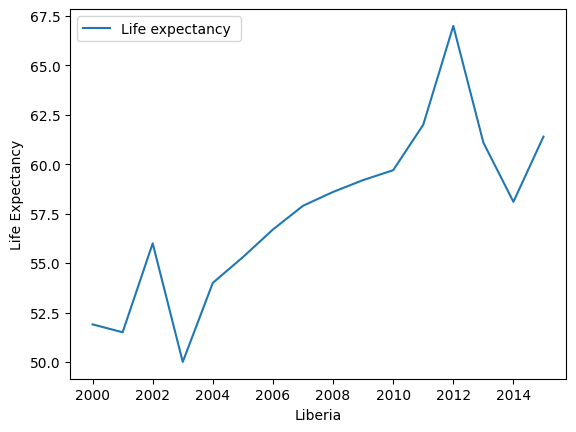

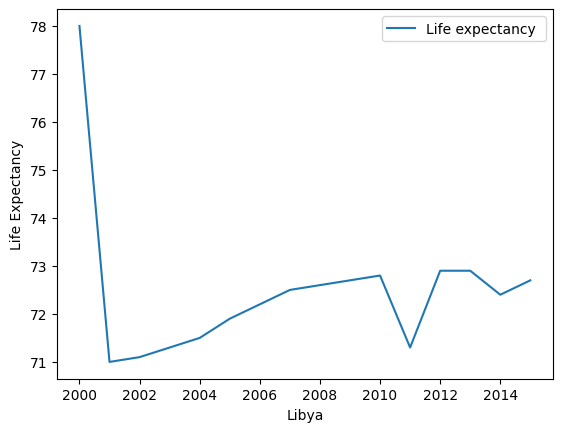

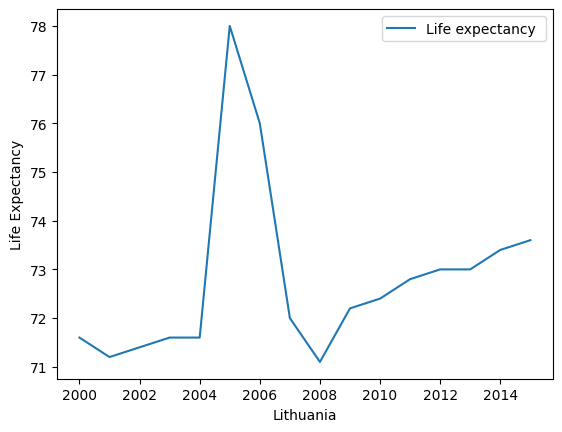

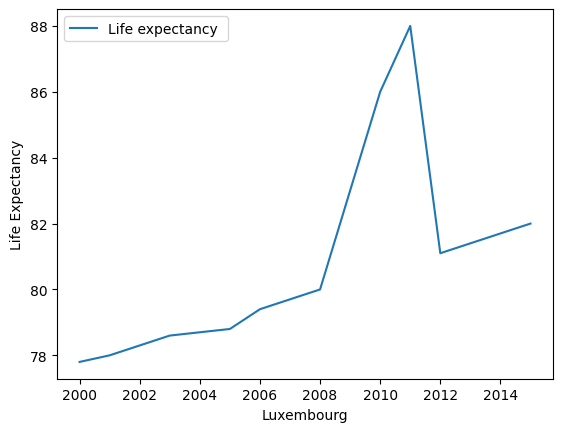

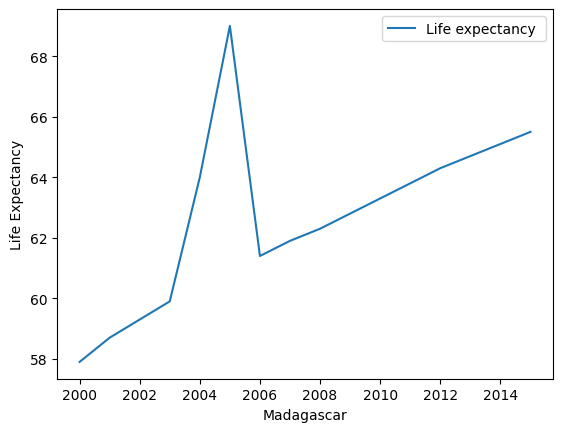

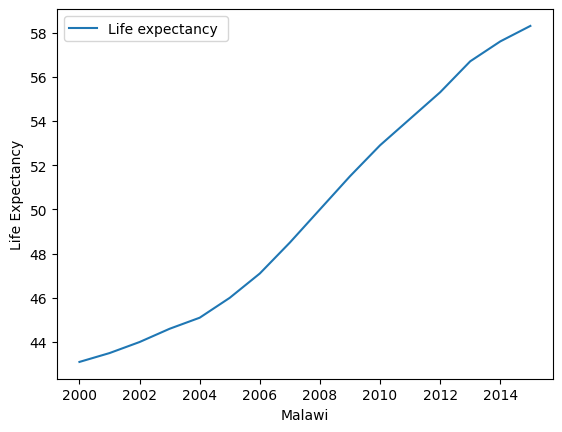

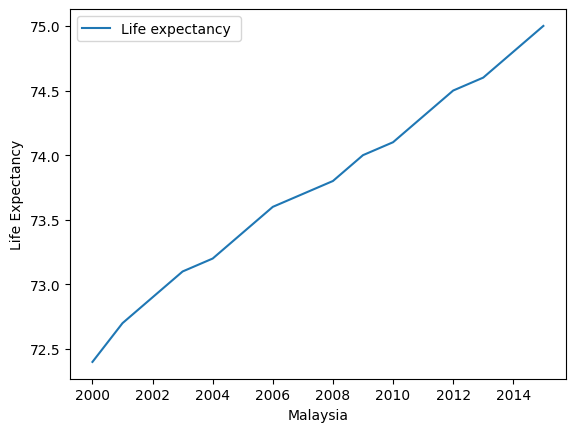

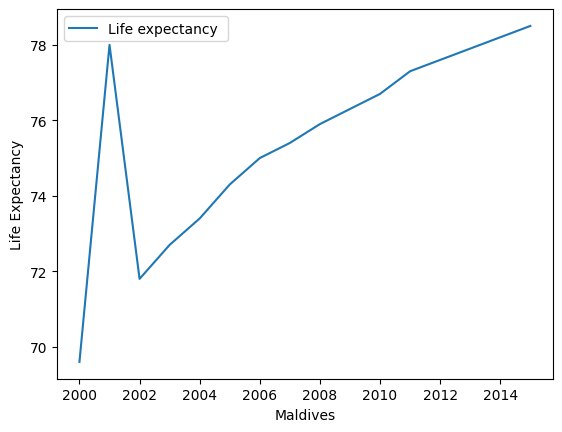

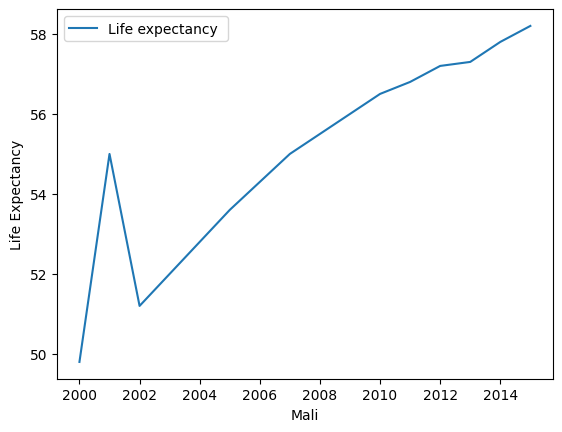

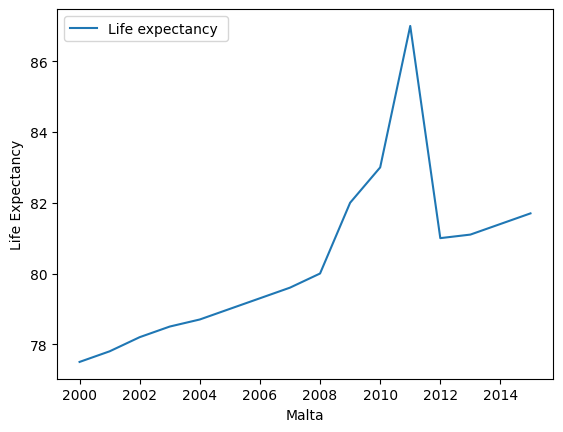

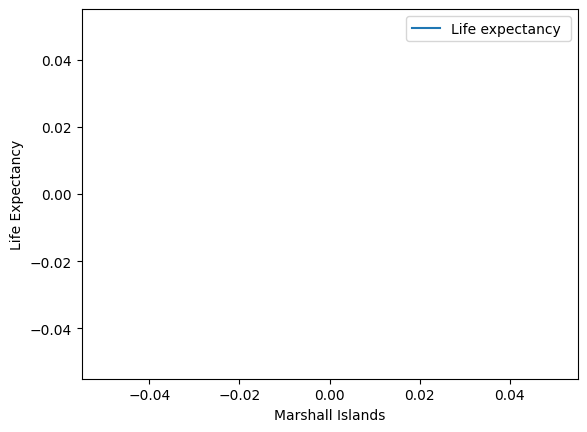

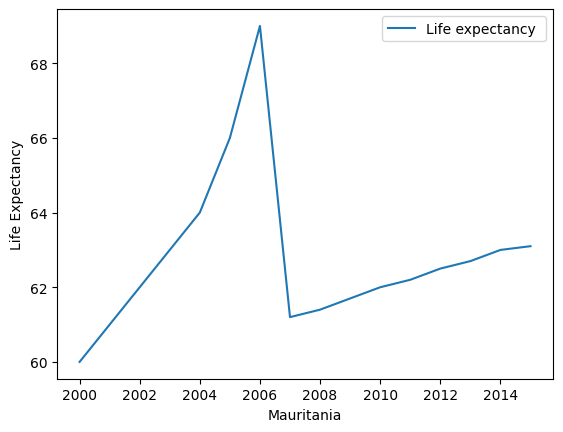

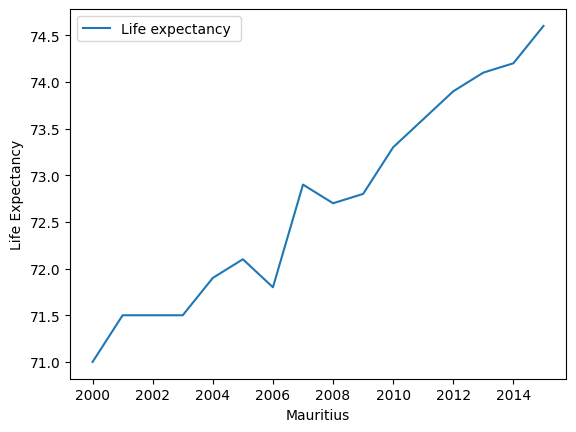

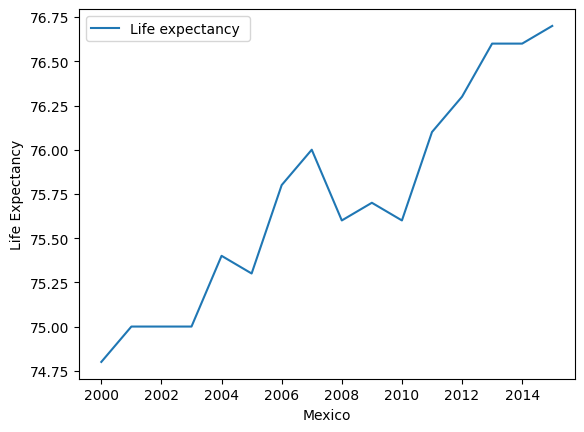

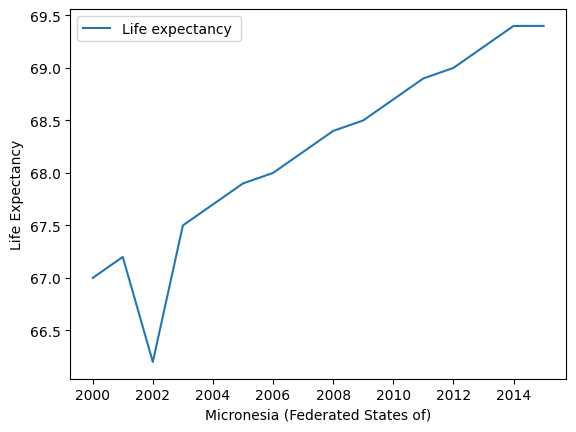

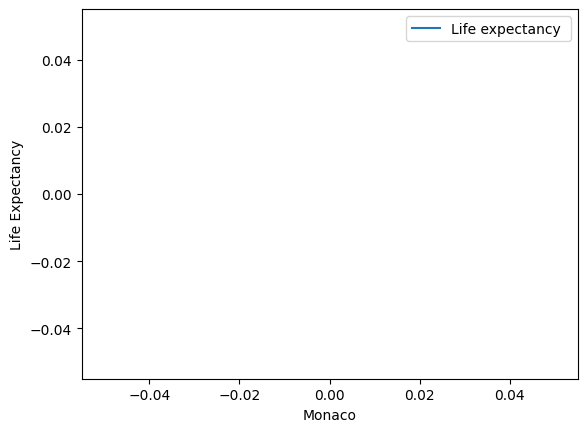

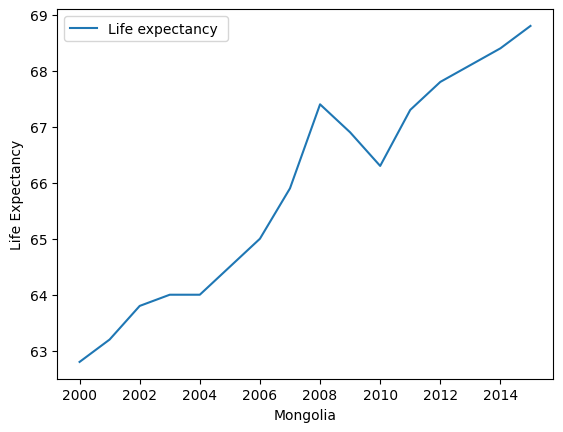

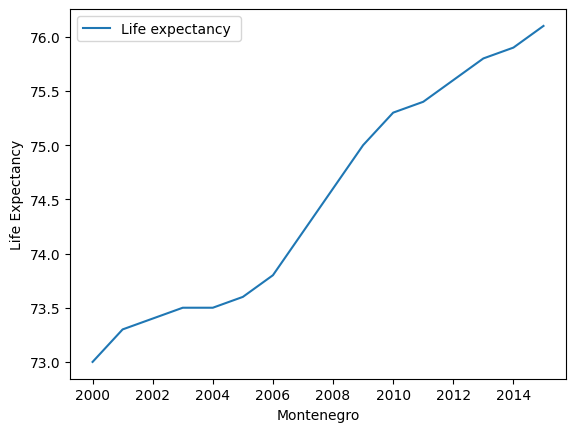

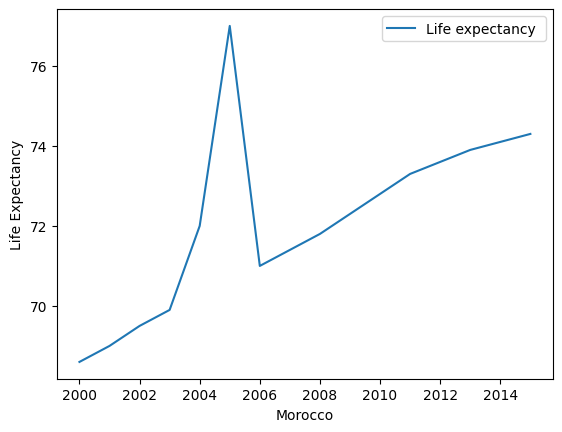

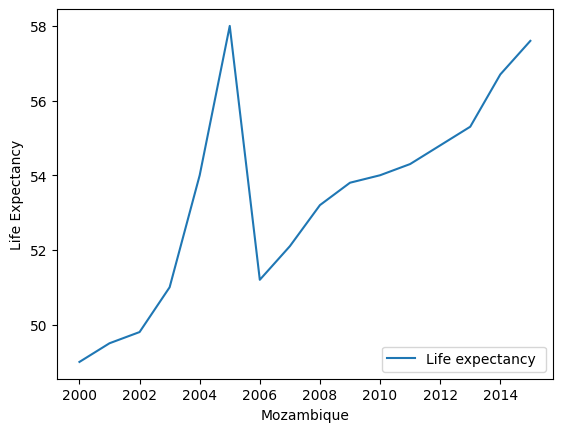

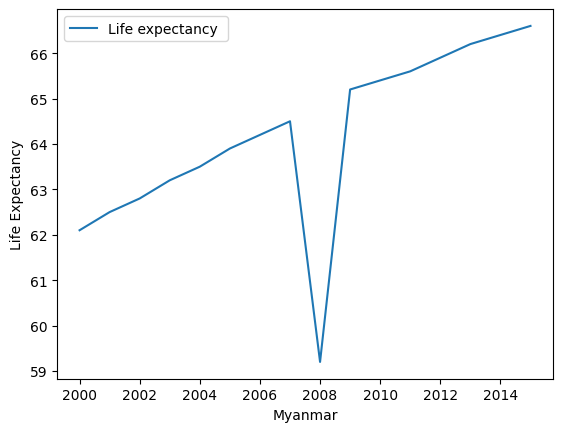

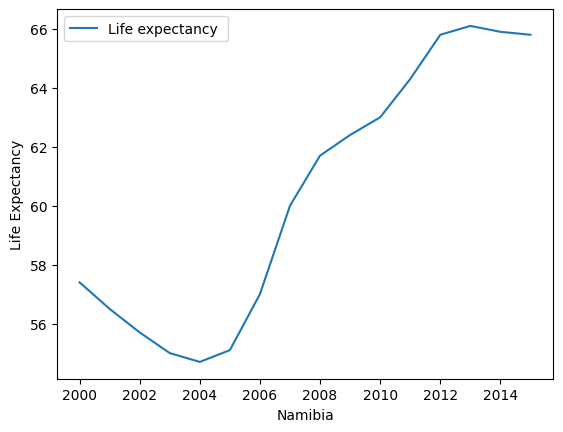

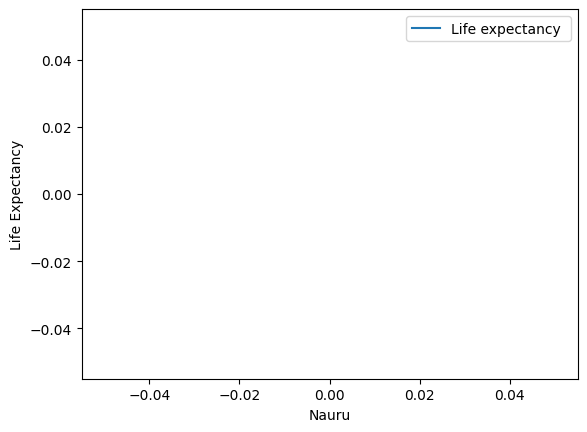

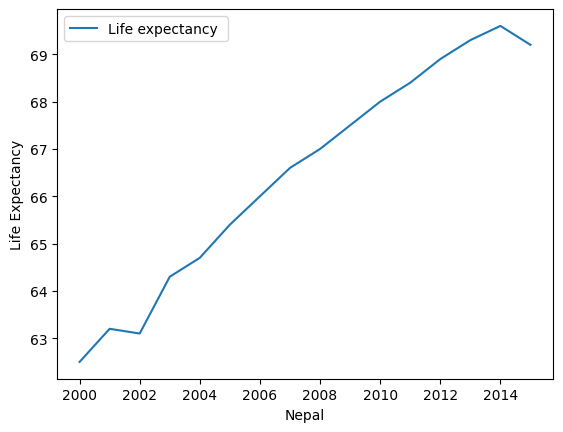

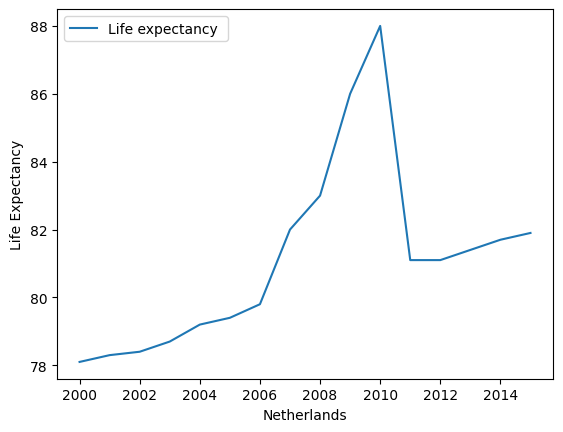

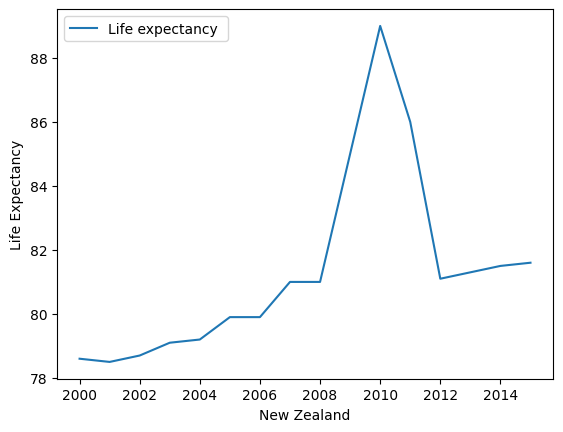

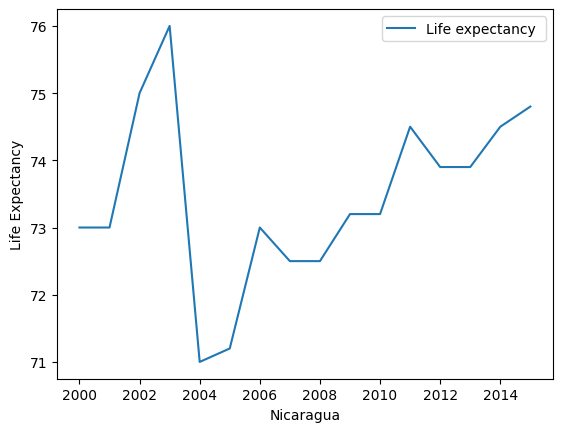

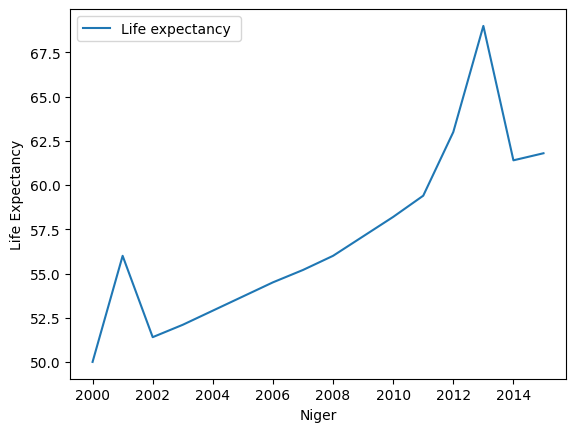

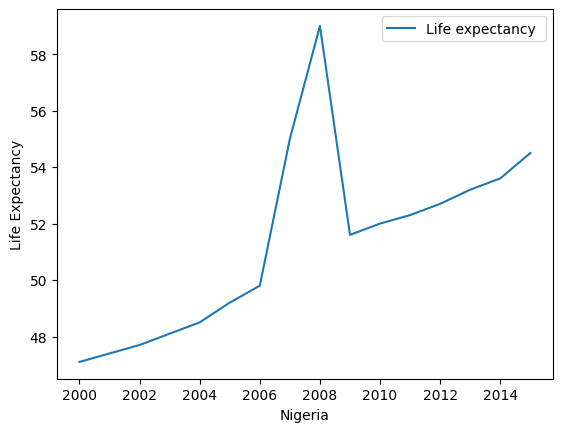

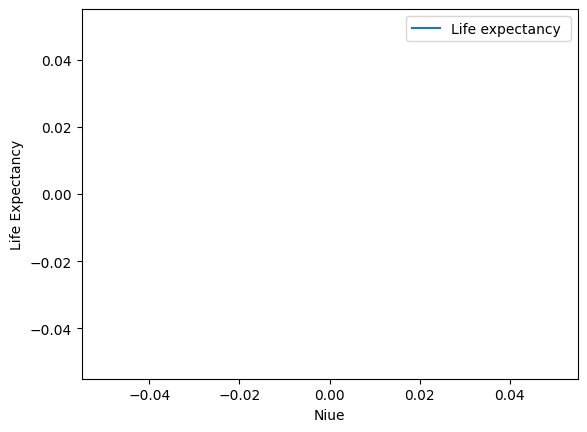

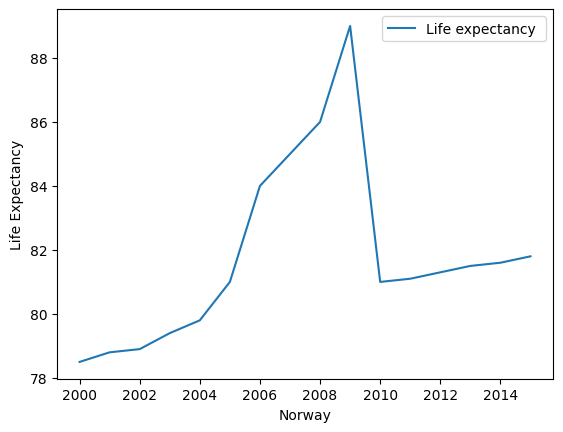

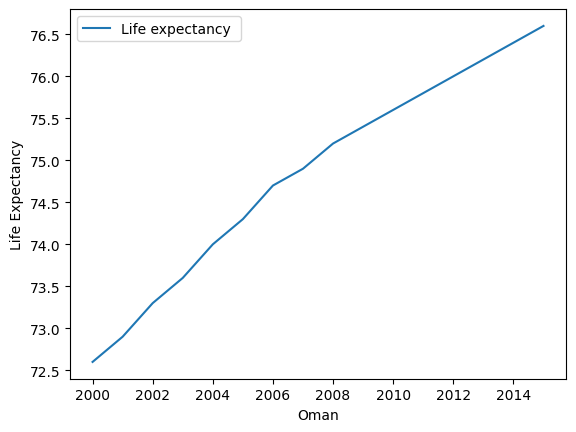

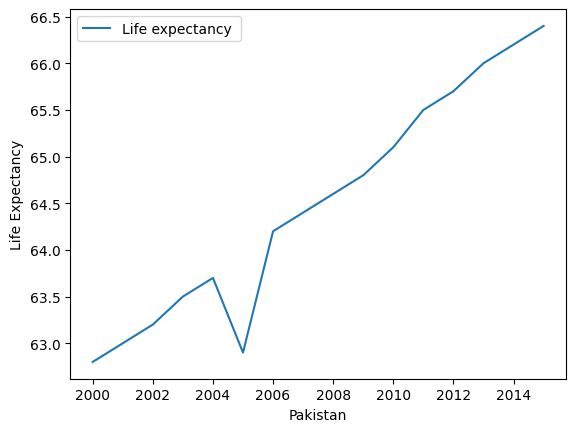

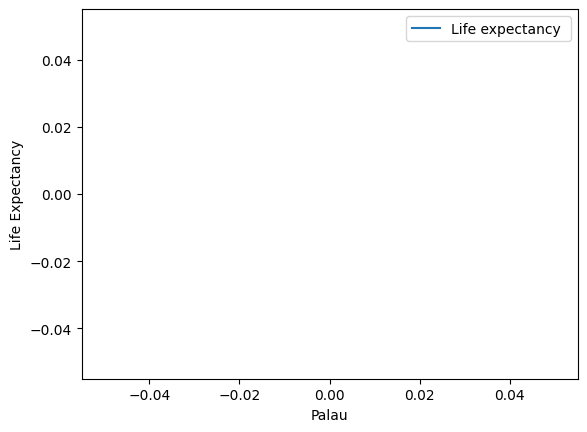

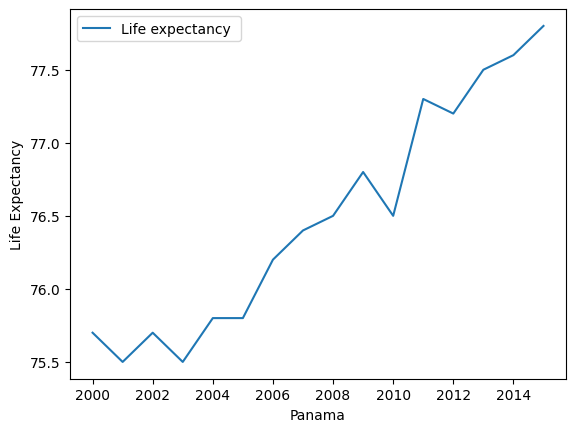

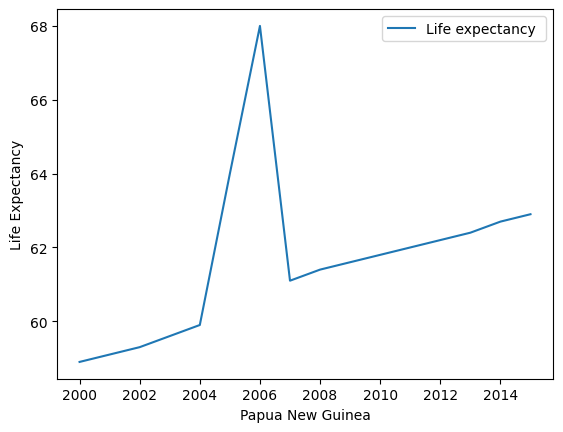

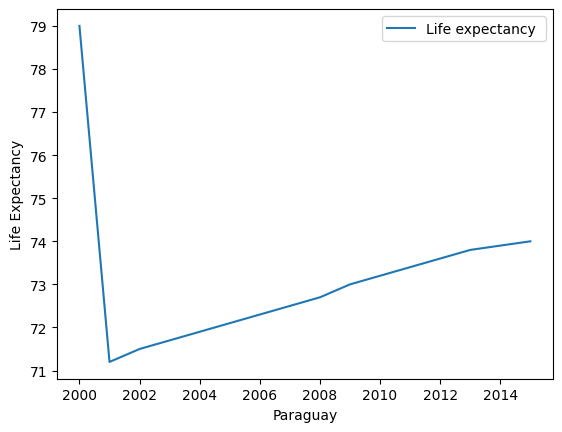

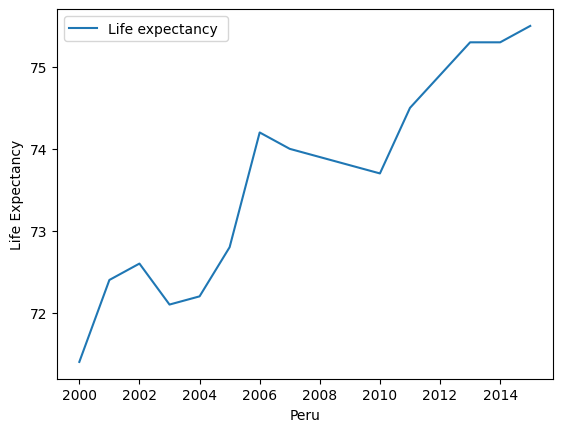

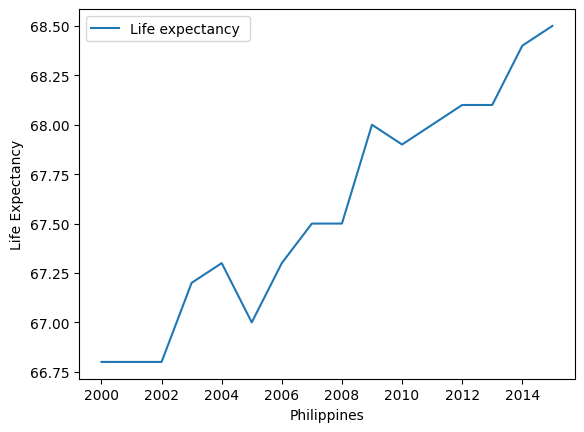

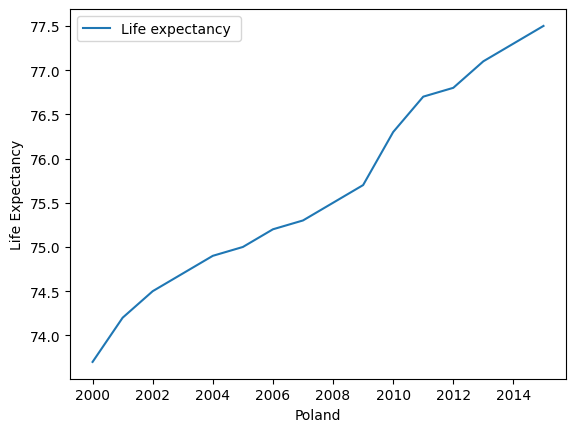

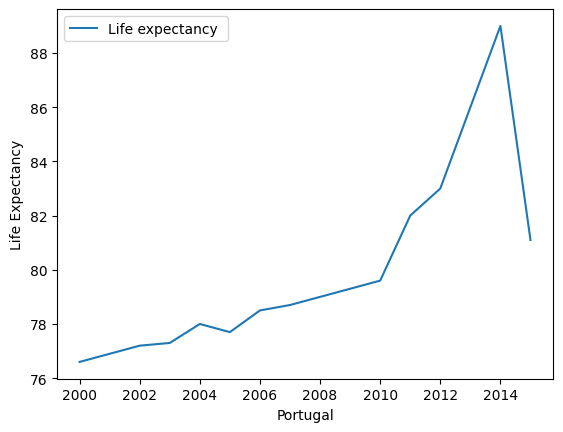

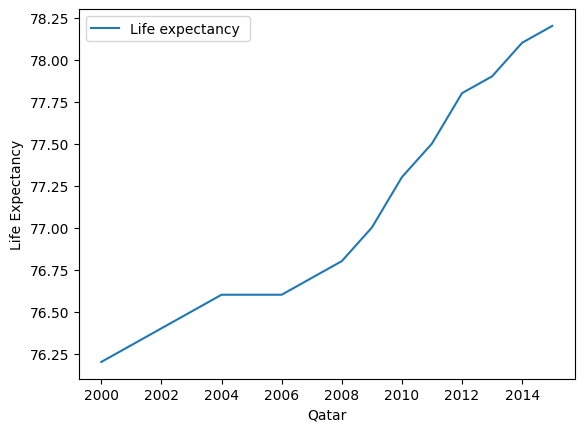

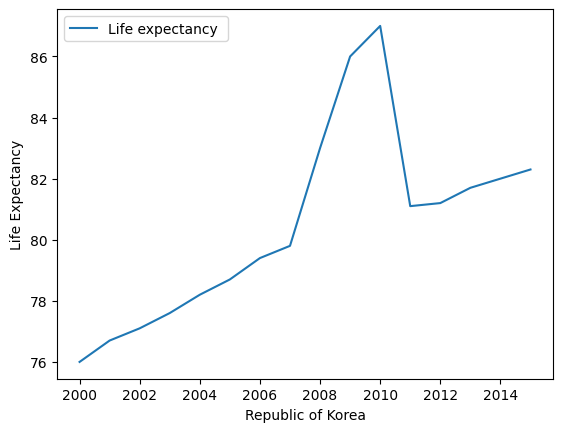

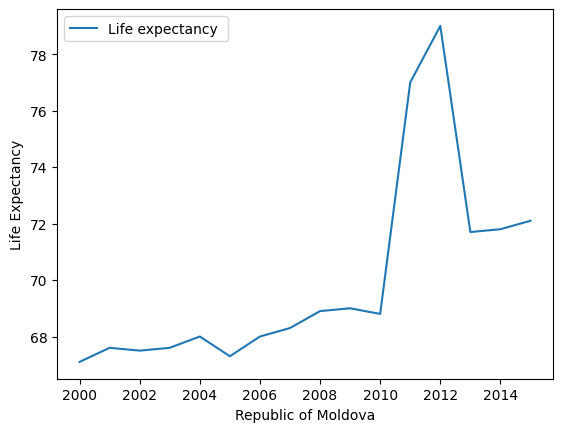

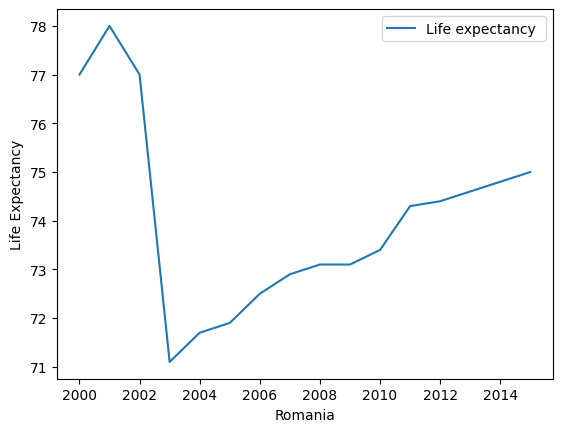

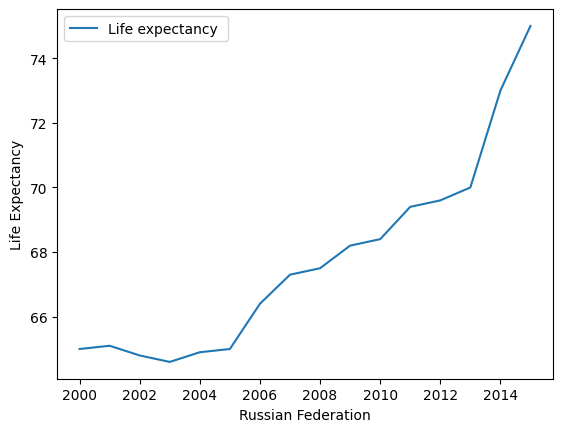

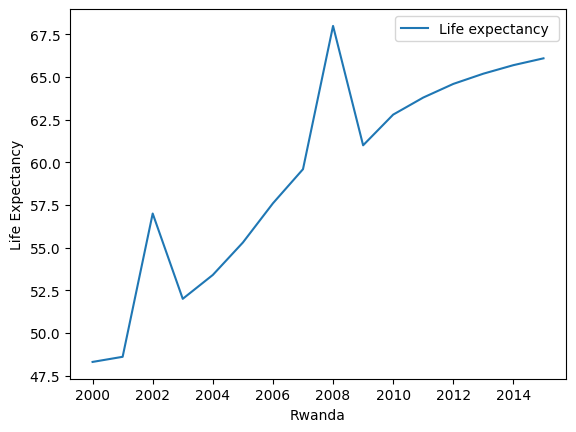

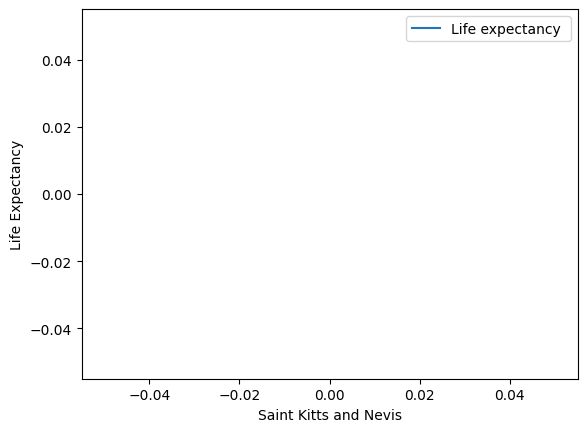

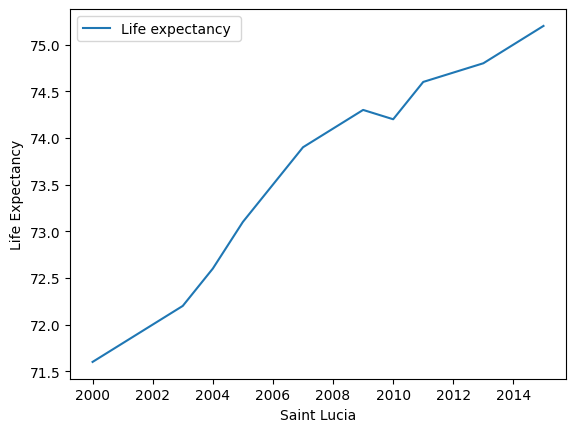

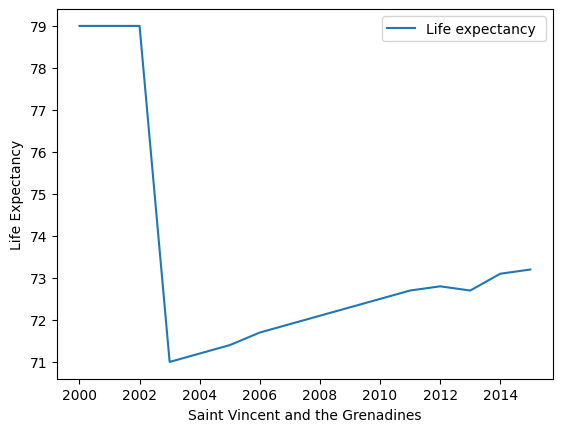

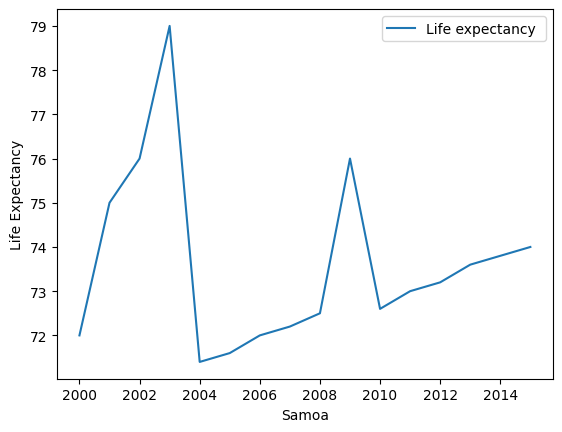

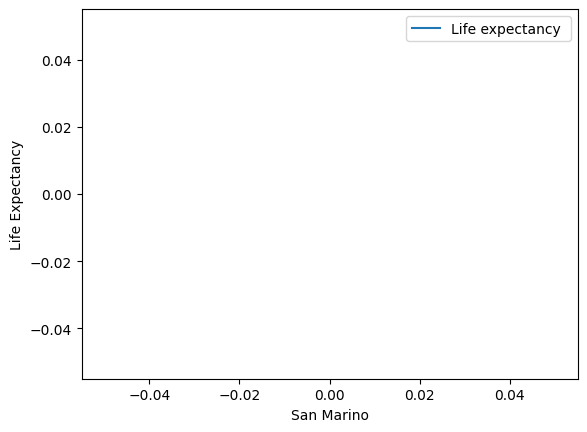

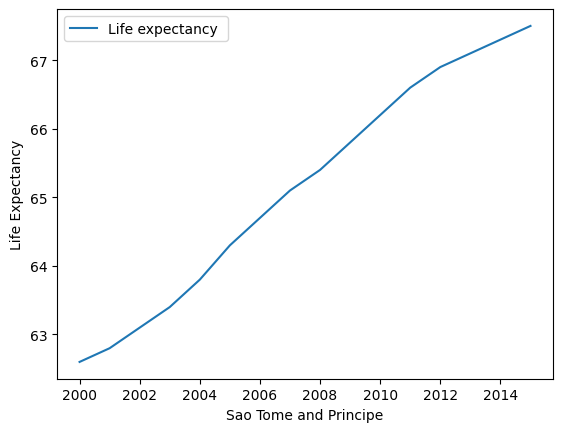

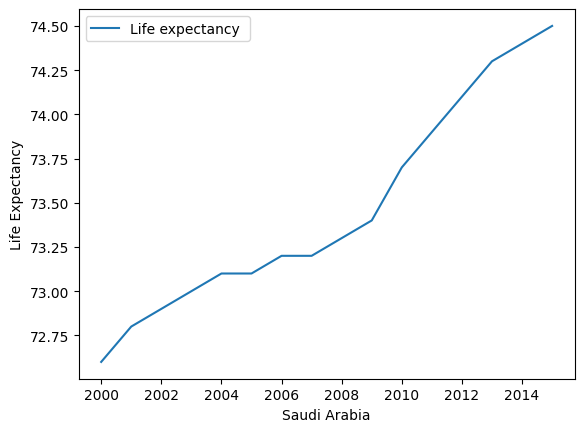

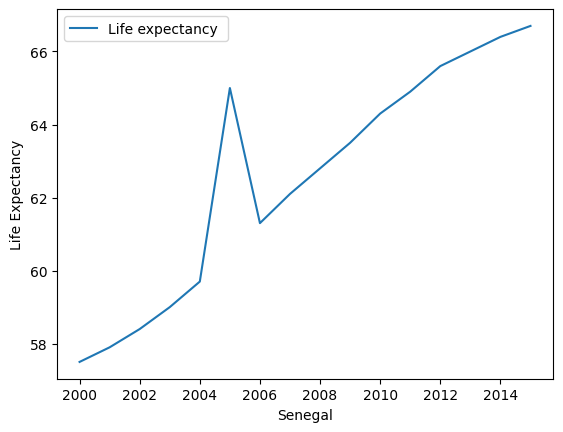

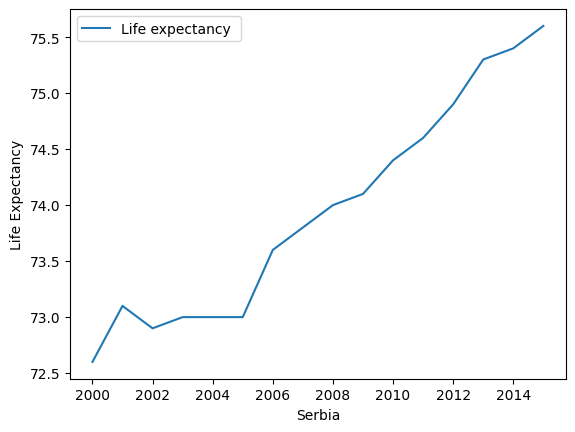

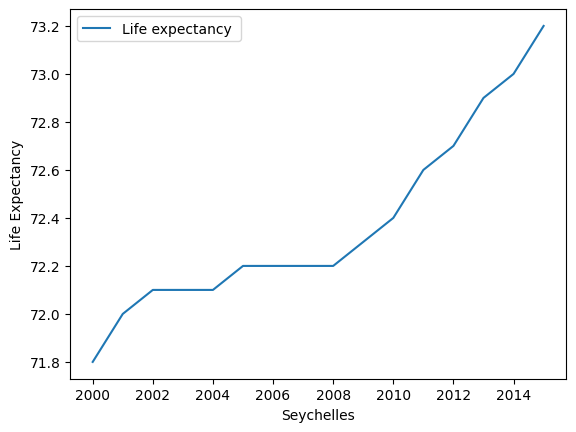

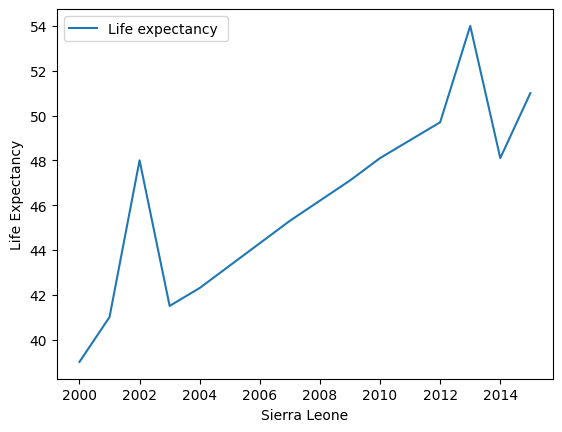

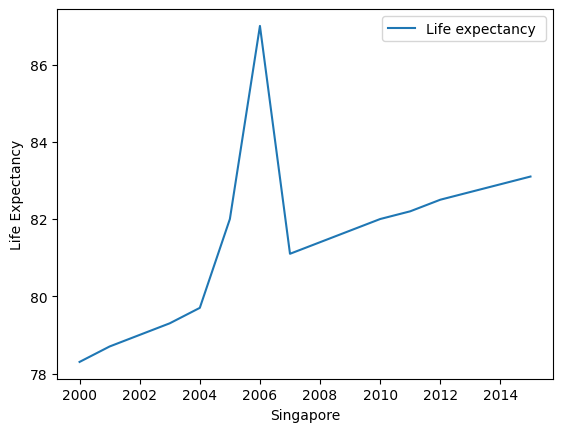

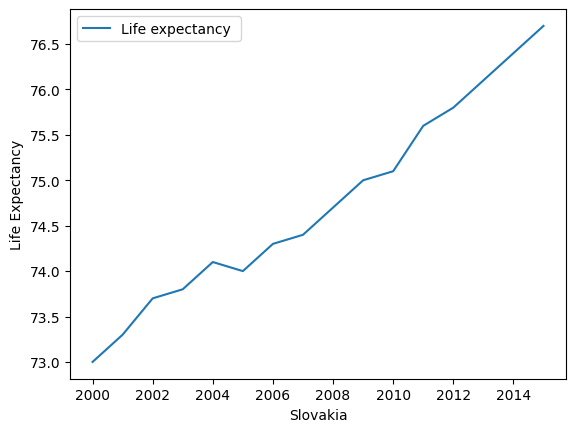

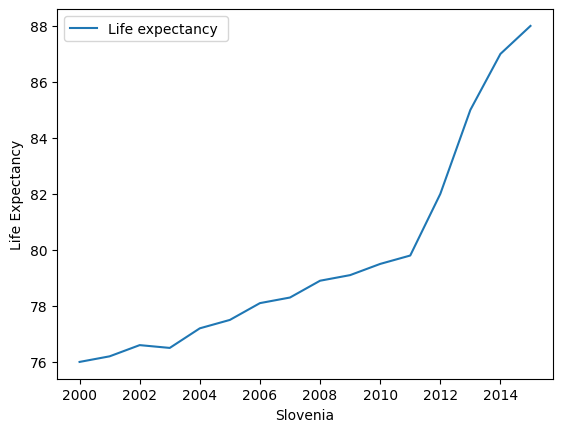

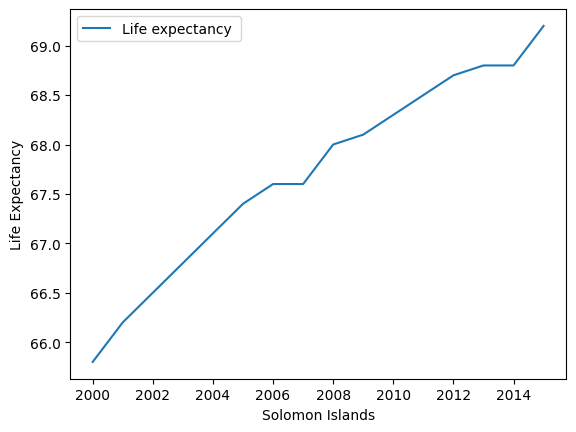

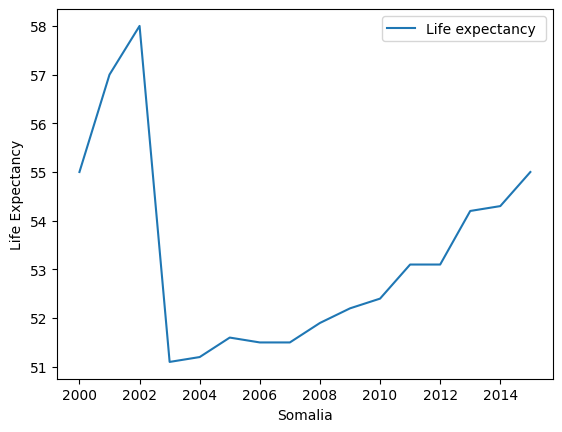

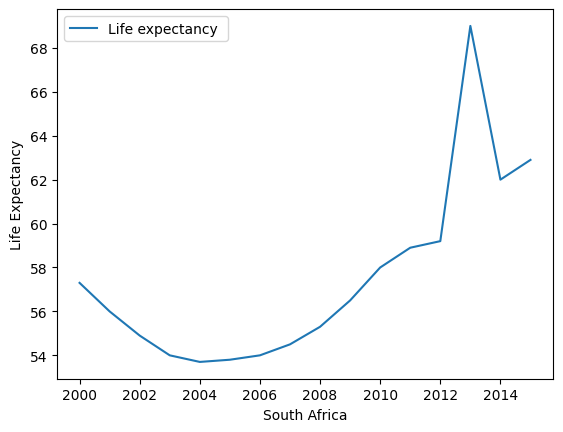

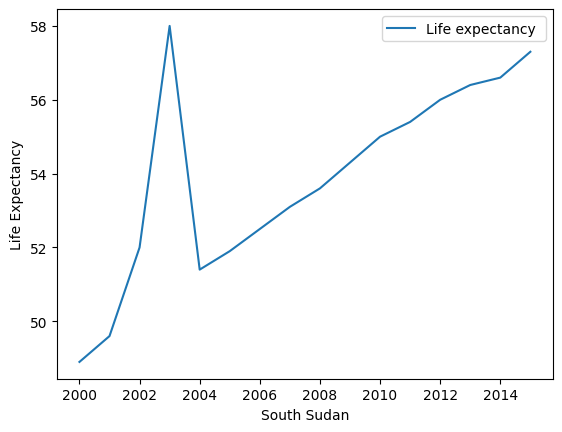

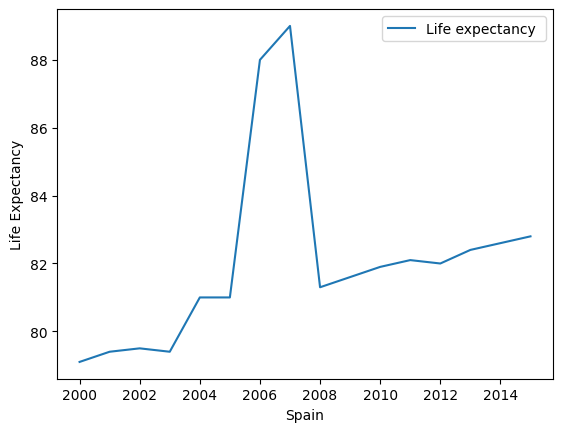

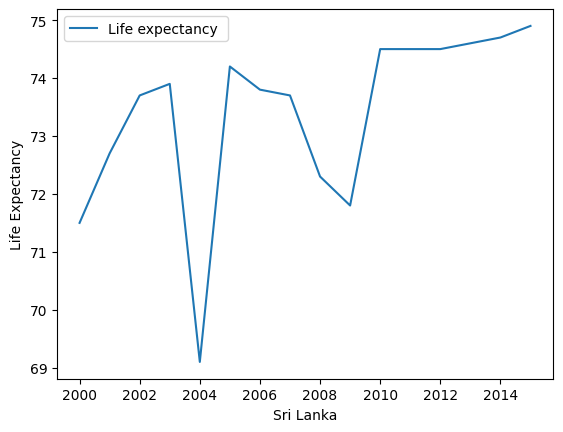

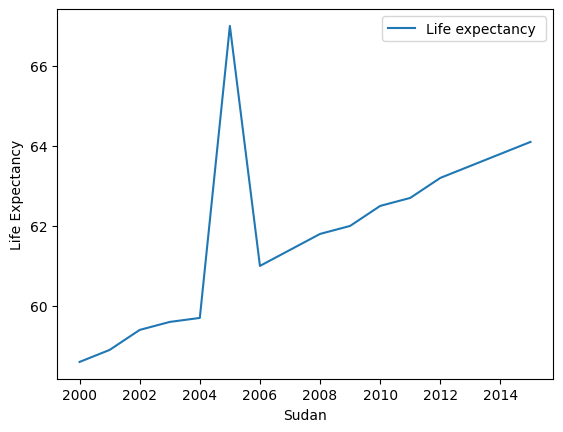

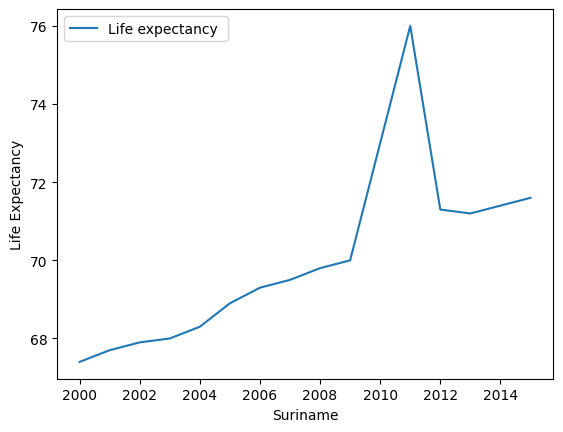

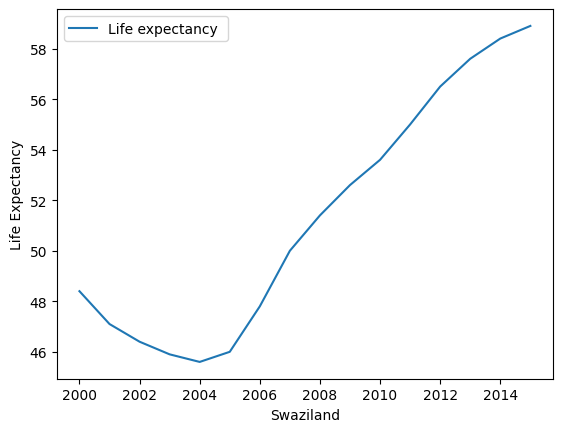

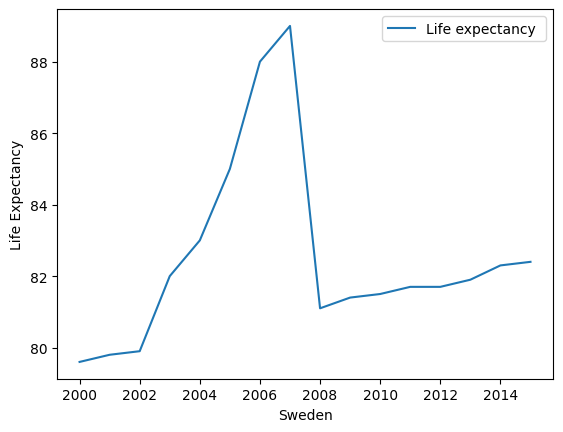

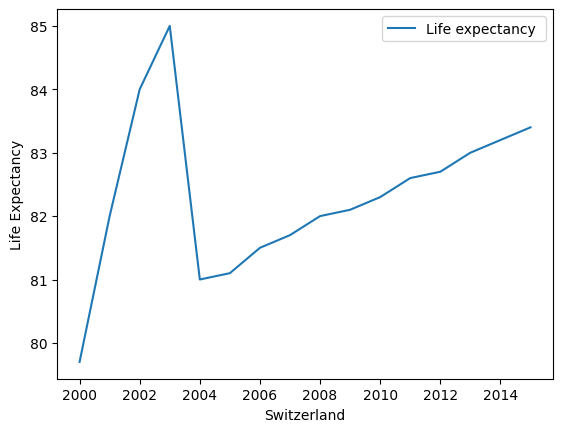

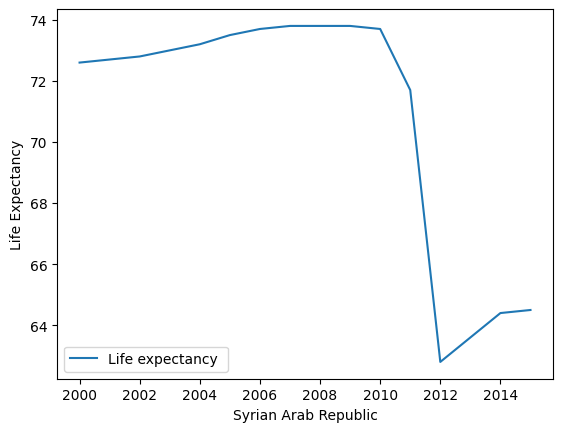

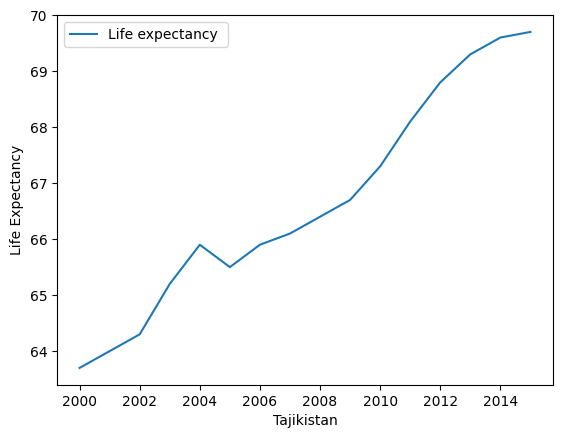

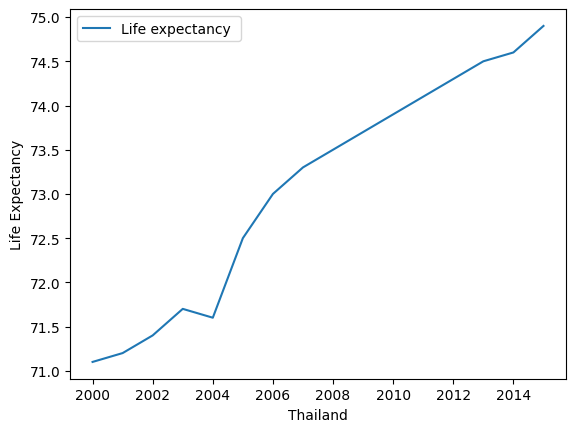

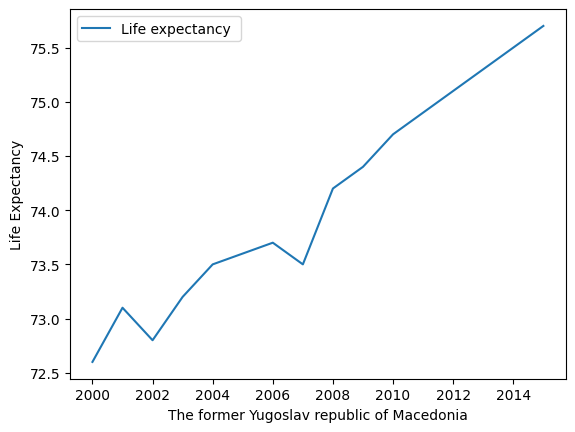

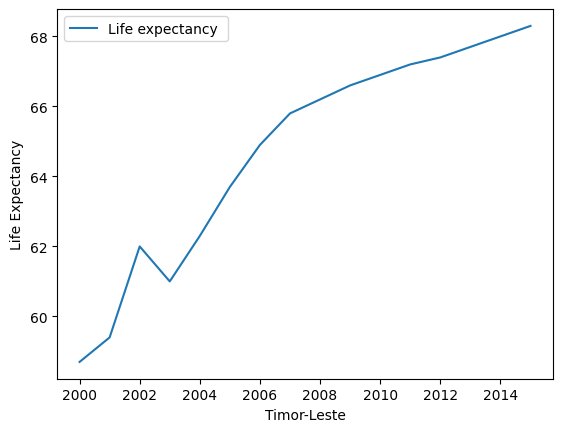

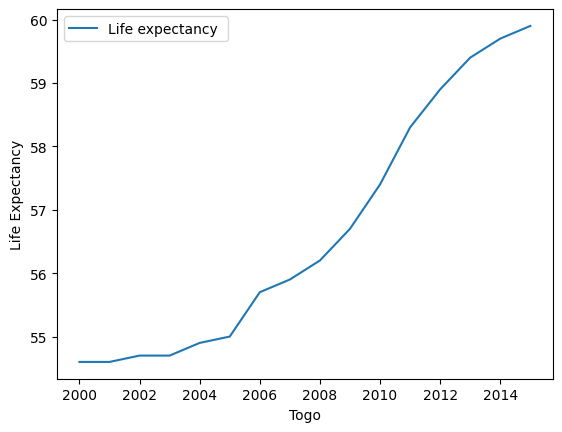

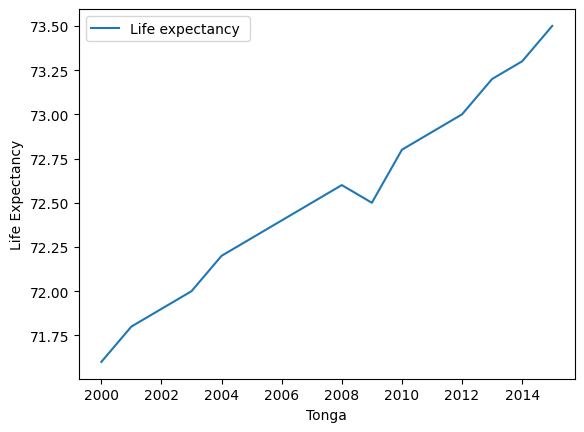

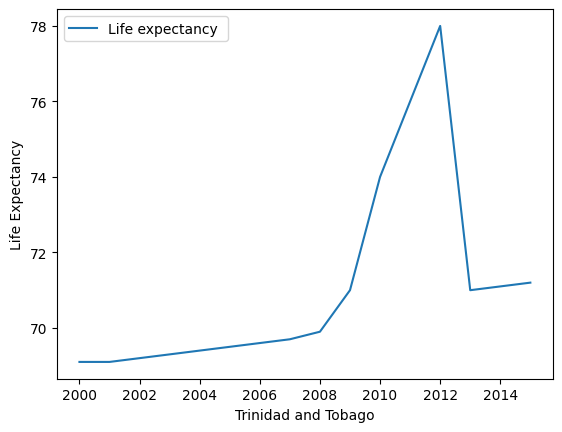

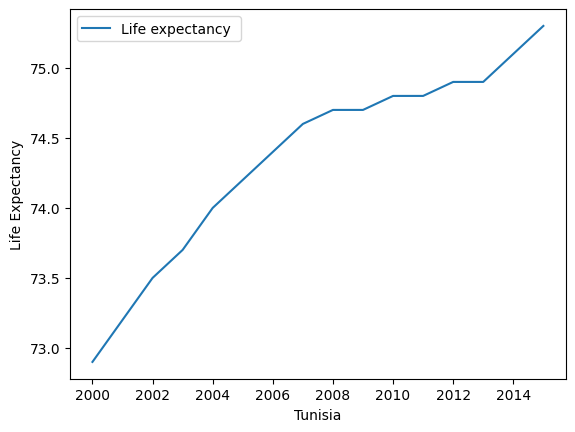

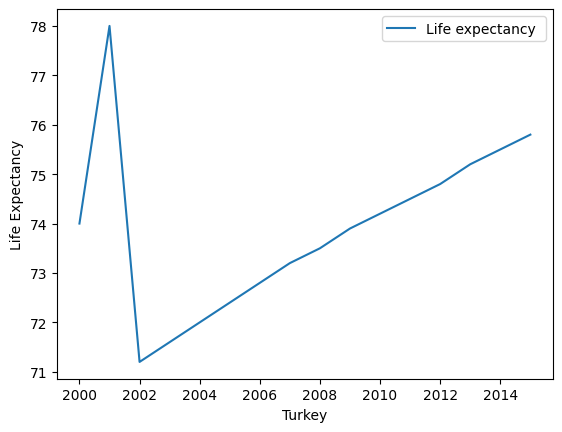

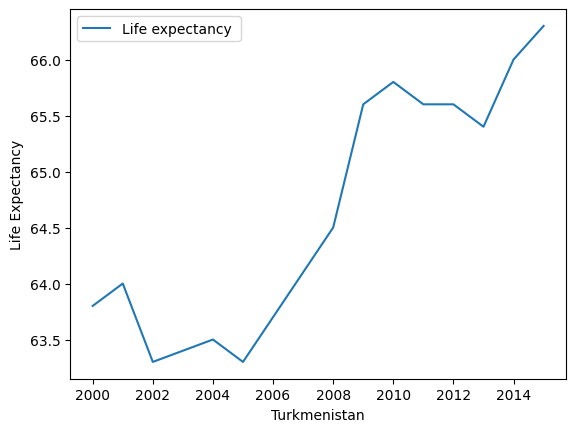

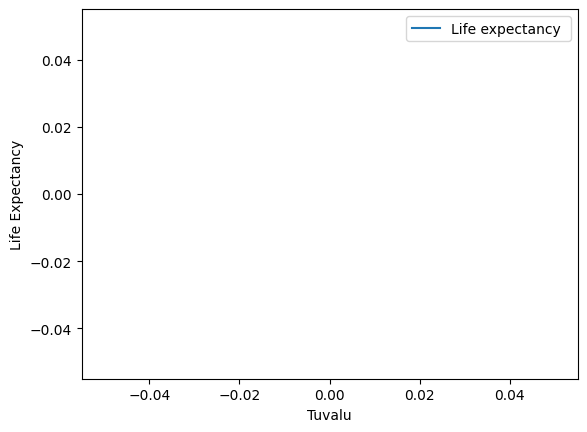

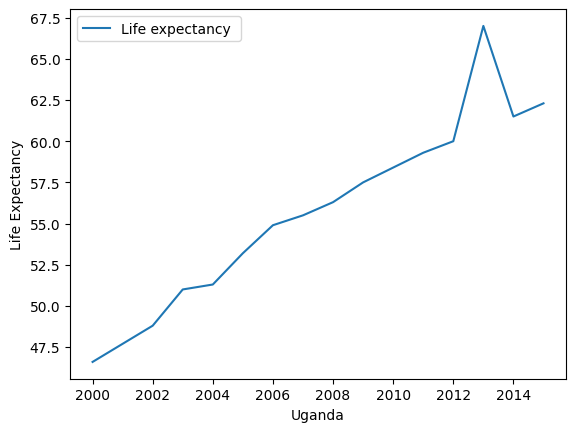

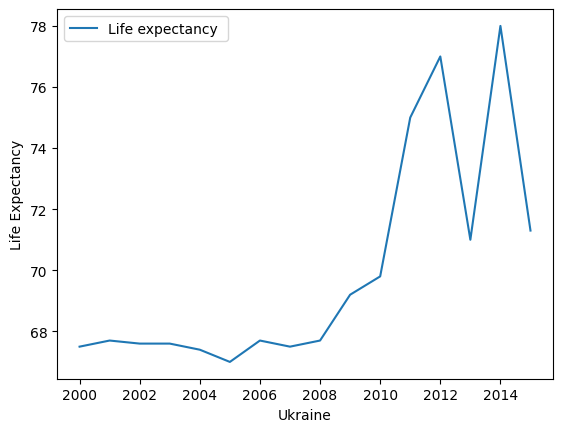

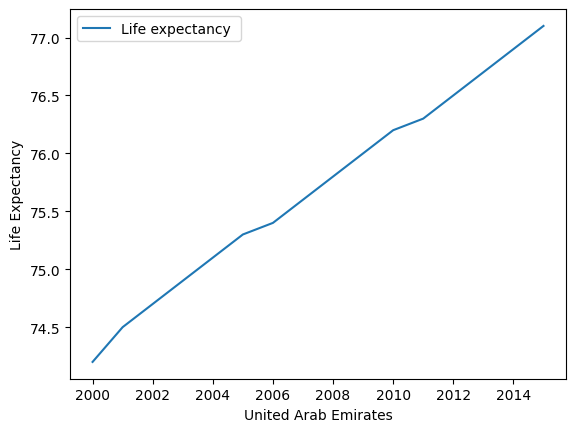

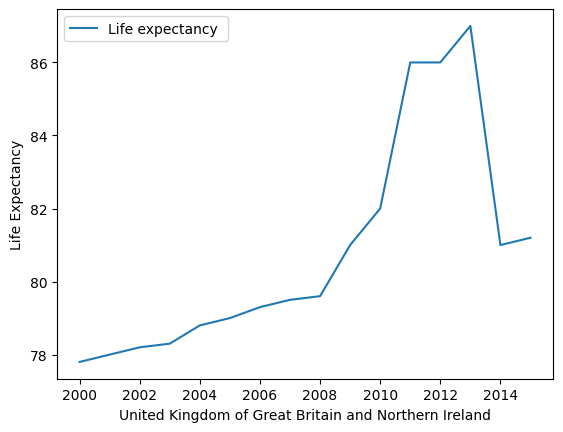

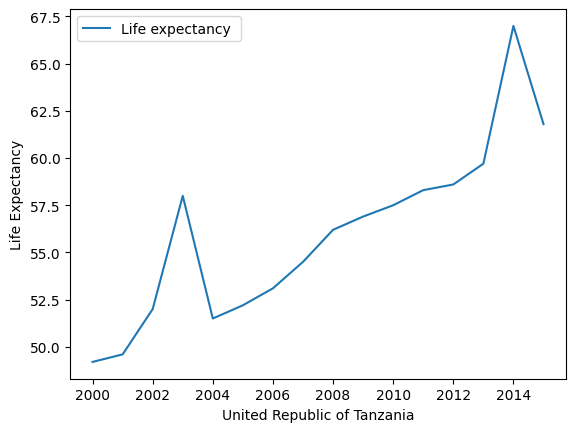

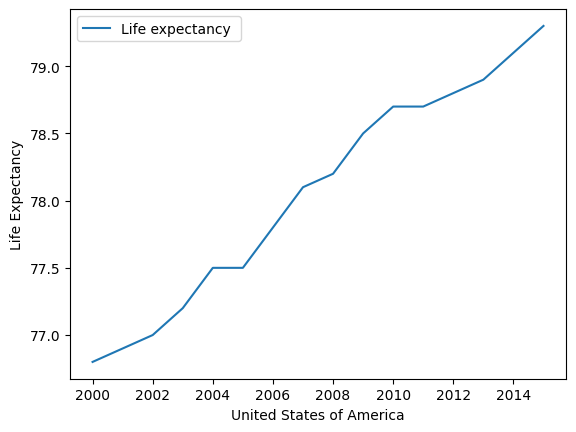

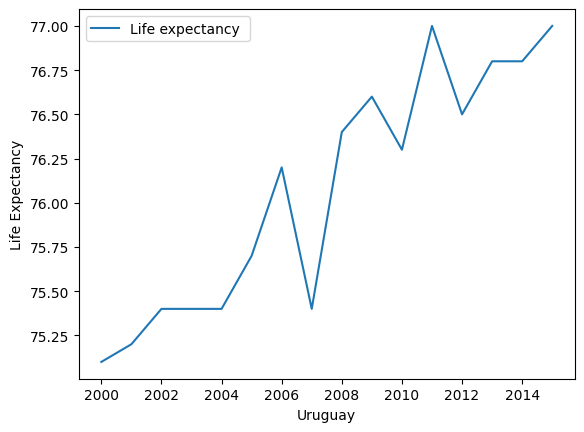

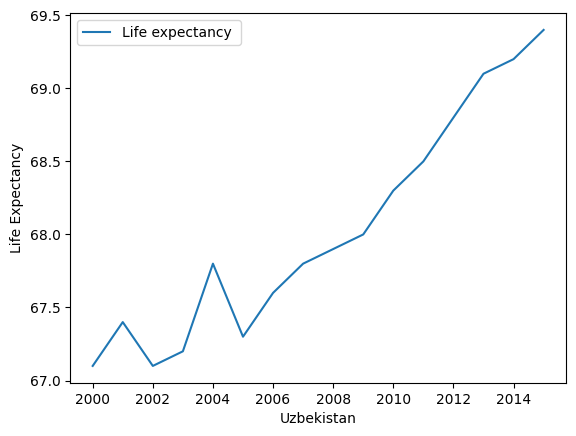

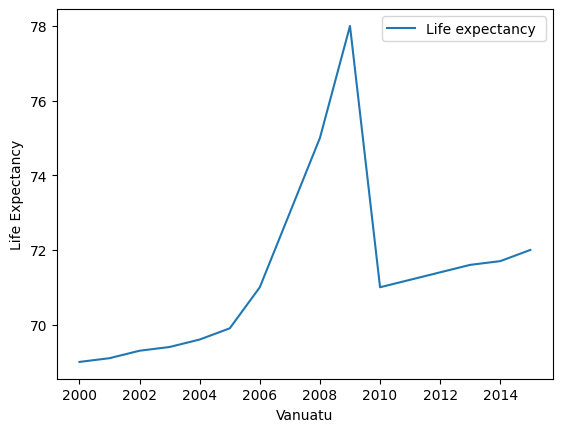

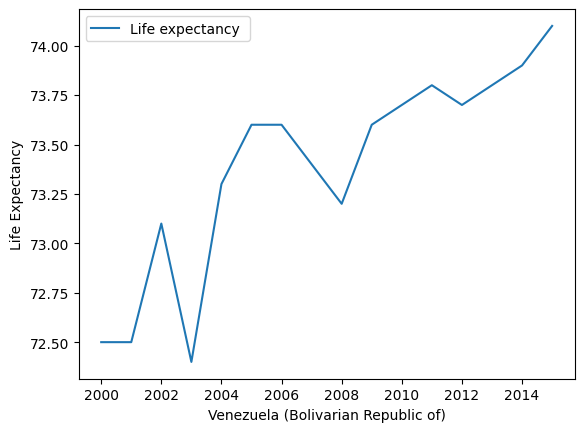

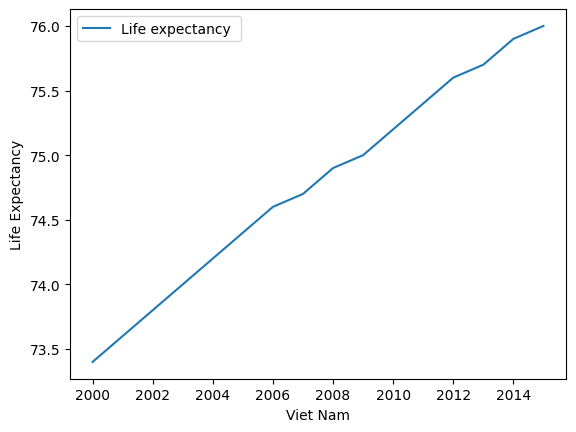

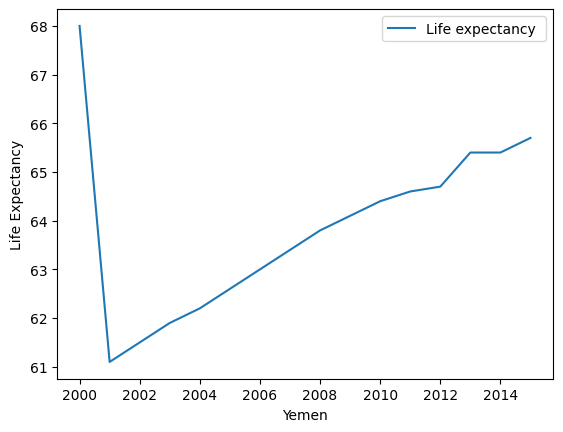

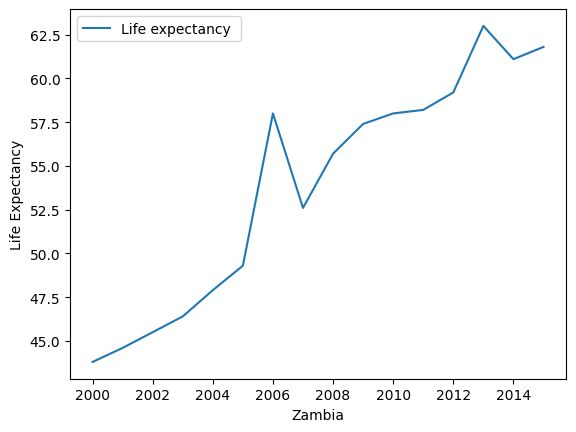

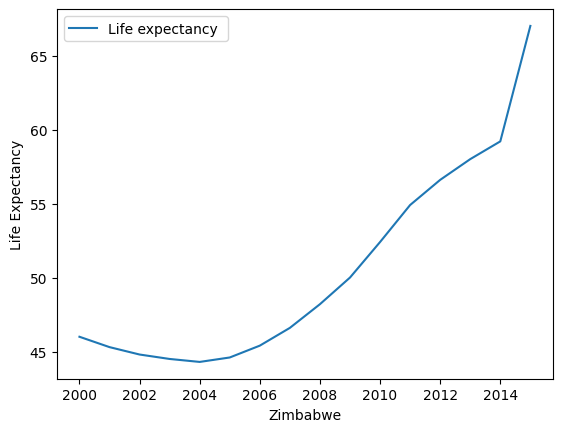

In [17]:
#print(df.columns.tolist())

copia_df = df[["Country","Year", 'Life expectancy ']].copy()

#copia_df

paises = copia_df.groupby("Country")

paises
#fig, ax = plt.subplots(figsize=(8,6))
for i, (name,group) in enumerate(paises):
  group.plot(x="Year",y="Life expectancy ", xlabel = name, ylabel='Life Expectancy')
  #group.plot(x="Year",y="Life expectancy ", label = name, ax= ax)  

plt.legend()
plt.show()

## Mortandad de diferentes enfermedades 

##### La idea es poder ver graficamente como estan los indicadores estadisticos principales para cada enfermedad en todos los paises y a lo largo de los años de los que se tienen datos.

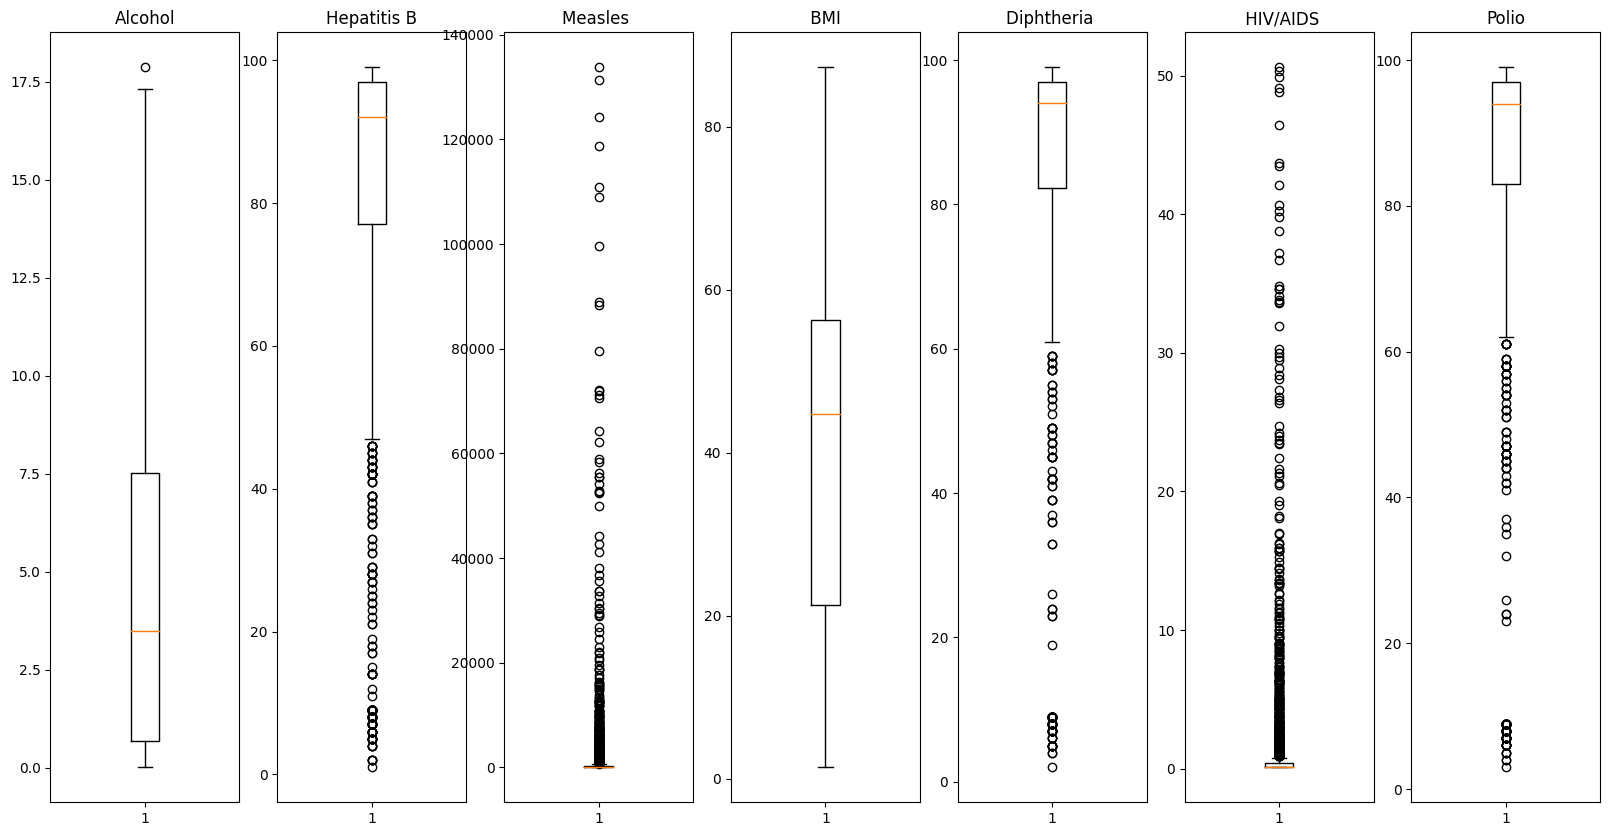

In [18]:
#print(df.columns.tolist())
df_mortandad = df[['Alcohol', 'Hepatitis B','Measles ', ' BMI ', 'Diphtheria ',' HIV/AIDS', 'Polio']].copy()
df_mortandad.head(100)
df_mortandad = df_mortandad.dropna()
#array_columnas = df_mortandad.to_numpy()
#print(array_columnas)
#fig = plt.figure(figsize =(17,8))
#for i, in keys:
#df_mortandad.boxplot()
fig, axs = plt.subplots(1,7,figsize=(20, 10))

keys=df_mortandad.columns.tolist()
len(df_mortandad.columns)

for i in ( range(len(df_mortandad.columns))):
    axs[i].boxplot(df_mortandad[df_mortandad.columns[i]])
    axs[i].set_title(df_mortandad.columns[i])
plt.show()



# Evolucion de la hepatitis B a lo largo de los años en el mundo


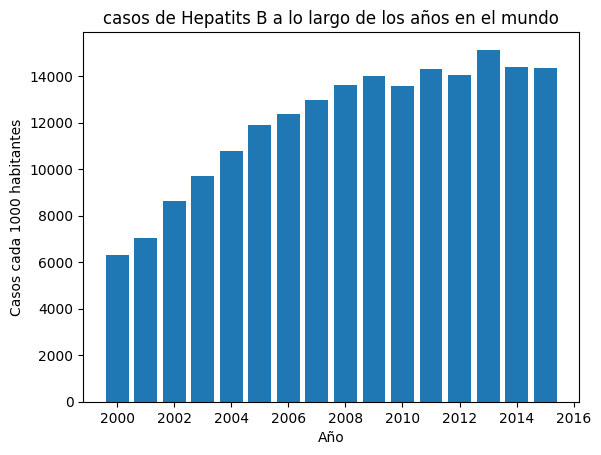

In [25]:
df_hepatitis = df[['Year','Hepatitis B']].copy()
#df_hepatitis = df_hepatitis.groupby('Year')


anios = df_hepatitis.groupby(df_hepatitis["Year"])["Hepatitis B"].sum()


plt.bar(anios.index,anios.values)
plt.xlabel('Año')
plt.ylabel('Casos cada 1000 habitantes')
plt.title('casos de Hepatits B a lo largo de los años en el mundo')
plt.show()

## Grafica de Mortalidad infantil y adulta para Argentina para el periodo 2000-2015. Valores cada 1000 habitantes

#### grafico de barras apiladas


In [24]:
df_mortalidad = df[['Country','Year','Adult Mortality','infant deaths']].copy()

df_mortalidad


#adultos = df_mortalidad.groupby(df_mortalidad["Year"])['Adult Mortality'].sum()

#ninios =df_mortalidad.groupby(df_mortalidad["Year"])['infant deaths'].sum() 

grafico = sns.Plot(df_mortalidad, 'Year', 'Adult Mortality' , color= 'Country').add(sns.Area(alpha=.7)),sns.Stack()



AttributeError: module 'seaborn' has no attribute 'Plot'